In [ ]:
#representation of correlation coefficient, root-mean-square error, absolute bias of 27driver sets based on 
#Random Forest and XGBoost used to estimate small (POC) and (GOC) particulate organic carbon concentration
#plot of feature importance
#results are obtained from RF_XGB_PredictorsInvestigation_ADS_22112021.ipynb

In [41]:
import pandas as pd
import numpy as np
import dataframe_image as dfi
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


In [2]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

In [3]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

In [46]:
def Plot_bar(x,df_x,df_y,var_name,label_1,label_2,name_var_plt,width,ymin,ymax,y_text_pos1,y_text_pos2,filename):
    plt.figure(figsize=[20. , 15.],facecolor='w') 
    plt.bar(x - width/2., df_x[var_name].values, width, label=label_1)
    plt.bar(x + width/2., df_y[var_name].values, width, label=label_2)

    if name_var_plt == 'Absolute bias (\u03BCmol/L)':
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        
    if name_var_plt == 'RMSE (\u03BCmol/L)' and filename[:3] == 'GOC':
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    locsX,labelsx = plt.xticks(size=35, rotation=45)
    plt.xticks(x, labels)
    plt.xlabel('Driver sets',fontsize=40)
    plt.ylabel(name_var_plt,fontsize=40)
    locsY,labelsy = plt.yticks(size=40) 
    if var_name == 'RMSE train':
        plt.legend()
        plt.legend(fontsize = 35)
    plt.vlines(x=[2.5, 5.5, 7.5, 8.5, 14.5, 16.5, 20.5, 24.5], ymin=0, ymax=ymax, colors='k', ls='--', lw=2)
    plt.ylim([ymin,ymax])
    if var_name[0:4] == 'RMSE':
        plt.text(1., y_text_pos1, 'No PFT', size=30, c='k', rotation='vertical')
        plt.text(3.5, y_text_pos1, 'PFT introduction', size=30, c='k', rotation='vertical')
        plt.text(6., y_text_pos1, 'Zooplankton combined', size=30, c='k', rotation='vertical')
        plt.text(7.5, y_text_pos1, 'No vertical BAC', size=30, c='k', rotation='vertical')
        plt.text(11.5, y_text_pos1, 'Individual PFT', size=30, c='k', rotation='vertical')
        plt.text(8.5, y_text_pos2, 'BAC', size=30, c='k', rotation='vertical')
        plt.text(9.5, y_text_pos2, 'PRO', size=30, c='k', rotation='vertical')
        plt.text(10.5, y_text_pos2, 'PTE', size=30, c='k', rotation='vertical')
        plt.text(11.5, y_text_pos2, 'MES', size=30, c='k', rotation='vertical')
        plt.text(12.5, y_text_pos2, 'GEL', size=30, c='k', rotation='vertical')
        plt.text(13.5, y_text_pos2, 'MAC', size=30, c='k', rotation='vertical')
        plt.text(14.5, y_text_pos1, 'Lat-Long', size=30, c='k', rotation='vertical')
        plt.text(15.5, y_text_pos1, 'Incident light', size=30, c='k', rotation='vertical')
        plt.text(18.5, y_text_pos1, 'PFT only + CHL', size=30, c='k', rotation='vertical')
        plt.text(22., y_text_pos1, 'Biochemical variables', size=30, c='k', rotation='vertical')
        plt.text(25.5, y_text_pos1, 'Month - 1', size=30, c='k', rotation='vertical')

    plt.savefig('/Figures_Article/'+filename)

In [6]:
#read statistics obtained in RF_XGB_PredictorsInvestigation_ADS_22112021.ipynb
r_filenameTSV1 = 'Diagnostics_POC_RF_2.csv'
Diagnostics_POC_RF = pd.read_csv(r_filenameTSV1)

r_filenameTSV1 = 'Diagnostics_POC_XGB_2.csv'
Diagnostics_POC_XGB = pd.read_csv(r_filenameTSV1)

r_filenameTSV1 = 'Diagnostics_GOC_RF_2.csv'
Diagnostics_GOC_RF = pd.read_csv(r_filenameTSV1)

r_filenameTSV1 = 'Diagnostics_GOC_XGB_2.csv'
Diagnostics_GOC_XGB = pd.read_csv(r_filenameTSV1)

In [7]:
#plot statistics in form of a table
Diagnostic_POC_RF_img = Diagnostics_POC_RF.style.apply(highlight_min, props='color:white;background-color:darkblue', axis=0)\
.apply(highlight_max, props='color:white;background-color:darkred', axis=0)
dfi.export(Diagnostic_POC_RF_img,'/Figures_Article/Diagnostic_POC_RF_img_2.png')

Diagnostic_GOC_RF_img = Diagnostics_GOC_RF.style.apply(highlight_min, props='color:white;background-color:darkblue', axis=0)\
.apply(highlight_max, props='color:white;background-color:darkred', axis=0)
dfi.export(Diagnostic_GOC_RF_img,'/Figures_Article/Diagnostic_GOC_RF_img_2.png')

Diagnostic_POC_xgb_img = Diagnostics_POC_XGB.style.apply(highlight_min, props='color:white;background-color:darkblue', axis=0)\
.apply(highlight_max, props='color:white;background-color:darkred', axis=0)
dfi.export(Diagnostic_POC_xgb_img,'/Figures_Article/Diagnostic_POC_xgb_img_2.png')

Diagnostic_GOC_xgb_img = Diagnostics_GOC_XGB.style.apply(highlight_min, props='color:white;background-color:darkblue', axis=0)\
.apply(highlight_max, props='color:white;background-color:darkred', axis=0)
dfi.export(Diagnostic_GOC_xgb_img,'/Figures_Article/Diagnostic_GOC_xgb_img_2.png')


In [8]:
Diagnostic_POC_xgb_img

,Unnamed: 0,Name,RMSE train,Bias_mean train,Bias_abs train,Corr train,RMSE valid,Bias_mean valid,Bias_abs valid,Corr valid,RMSE IV,Bias_mean IV,Bias_abs IV,Corr IV
0,0,_NoPFT,0.0857188,-0.000225723,0.0524037,0.979719,0.183331,0.0071859,0.0919993,0.902125,0.240085,-0.0749682,0.122739,0.670593
1,1,_NoPFT_MLD,0.0746946,-0.000177891,0.0491991,0.984653,0.179198,0.00419173,0.0941512,0.905294,0.246236,-0.0710575,0.124982,0.669835
2,2,_PFT,0.0486816,-0.000890732,0.0295642,0.993487,0.0908735,-0.000855626,0.0435469,0.97591,0.0731571,-0.0111037,0.0369806,0.963911
3,3,_PhMLD,0.048308,-0.00180188,0.030045,0.993683,0.0935988,-0.000887008,0.0444776,0.97451,0.0705329,-0.0110233,0.0359965,0.965988
4,4,_PhZMLD,0.047449,-0.00131148,0.0292533,0.993871,0.0953383,-0.000978203,0.0445002,0.973435,0.0708745,-0.00944872,0.0351126,0.965308
5,5,_zootest,0.0473486,-0.00128451,0.0294174,0.993933,0.096043,0.00146392,0.0442728,0.973963,0.0771679,-0.0161308,0.0396948,0.961391
6,6,_zootest2,0.0470788,-0.000890553,0.0291355,0.993938,0.0967212,0.00207937,0.0441449,0.973585,0.0848961,-0.016153,0.0410975,0.954075
7,7,_PhZBACMLD,0.0486564,-0.00100392,0.029963,0.993509,0.0974695,0.000310628,0.0457316,0.972327,0.0743252,-0.0112967,0.0374677,0.961938
8,8,_PhZMLD_BAC,0.0551784,-0.000819207,0.0358264,0.99176,0.12611,0.00152978,0.0624097,0.954468,0.156462,-0.0365189,0.0722609,0.853858
9,9,_PhZMLD_PRO,0.0493649,-0.00115359,0.0304544,0.993315,0.107813,0.00201508,0.0483367,0.96635,0.0801296,-0.0109152,0.0373159,0.956474


In [9]:
Diagnostic_POC_RF_img

,Unnamed: 0,Name,RMSE train,Bias_mean train,Bias_abs train,Corr train,RMSE valid,Bias_mean valid,Bias_abs valid,Corr valid,RMSE IV,Bias_mean IV,Bias_abs IV,Corr IV
0,0,_NoPFT,0.129921,-0.000128442,0.063511,0.950612,0.224064,0.00959603,0.0968056,0.842188,0.409284,-0.114093,0.158965,0.456008
1,1,_NoPFT_MLD,0.104141,-0.000106985,0.0535253,0.968831,0.235048,0.000299833,0.0953194,0.829274,0.508769,-0.141167,0.189244,0.392282
2,2,_PFT,0.0713372,-4.26495e-05,0.0278628,0.985305,0.110178,3.8208e-05,0.0439057,0.964401,0.086273,-0.00745235,0.0327009,0.951886
3,3,_PhMLD,0.0656807,0.000150294,0.0267352,0.987649,0.106222,0.00224425,0.0428619,0.966722,0.0722566,-0.00309593,0.0306909,0.964597
4,4,_PhZMLD,0.0637406,6.62393e-05,0.0260576,0.988376,0.100933,0.000970894,0.0413669,0.96999,0.072849,-0.00395873,0.0308107,0.963034
5,5,_zootest,0.0658133,-8.94234e-06,0.027151,0.987675,0.0928439,0.00241945,0.0390974,0.974951,0.0771221,-0.00364409,0.0319639,0.961728
6,6,_zootest2,0.0672005,-4.91246e-05,0.0274595,0.987076,0.0925019,0.00161593,0.0395084,0.975004,0.0799083,-0.00458141,0.0326115,0.959681
7,7,_PhZBACMLD,0.0653729,-6.23527e-05,0.0270232,0.987744,0.103025,0.00151875,0.0423495,0.968718,0.0741178,-0.00463387,0.0321634,0.961975
8,8,_PhZMLD_BAC,0.0795599,2.13524e-05,0.0379393,0.981978,0.146308,0.00700904,0.0615274,0.936918,0.234571,-0.0495595,0.0813865,0.746272
9,9,_PhZMLD_PRO,0.0643354,4.90408e-06,0.0273799,0.988114,0.114875,0.0047991,0.0450219,0.961304,0.082538,-0.00601346,0.0336245,0.956791


In [10]:
Diagnostics_POC_XGB.mean()

Unnamed: 0         13.000000
RMSE train          0.051846
Bias_mean train    -0.001075
Bias_abs train      0.032384
Corr train          0.992438
RMSE valid          0.108627
Bias_mean valid     0.000771
Bias_abs valid      0.051853
Corr valid          0.964061
RMSE IV             0.101711
Bias_mean IV       -0.019704
Bias_abs IV         0.049836
Corr IV             0.918881
dtype: float64

In [11]:
Diagnostics_POC_RF.mean()

Unnamed: 0         13.000000
RMSE train          0.072689
Bias_mean train    -0.000008
Bias_abs train      0.031447
Corr train          0.984206
RMSE valid          0.119657
Bias_mean valid     0.002454
Bias_abs valid      0.049673
Corr valid          0.953480
RMSE IV             0.132079
Bias_mean IV       -0.020541
Bias_abs IV         0.051674
Corr IV             0.881407
dtype: float64

In [12]:
Diagnostic_GOC_xgb_img

,Unnamed: 0,Name,RMSE train,Bias_mean train,Bias_abs train,Corr train,RMSE valid,Bias_mean valid,Bias_abs valid,Corr valid,RMSE IV,Bias_mean IV,Bias_abs IV,Corr IV
0,0,_NoPFT,0.0153107,-0.00160233,0.0107232,0.928822,0.0215317,0.000405465,0.0130908,0.818126,0.0282547,-0.00366549,0.0192657,0.564769
1,1,_NoPFT_MLD,0.0120834,-0.00185841,0.00861091,0.960196,0.0195469,0.000269644,0.0119819,0.85955,0.0308368,-0.0111182,0.0208347,0.588384
2,2,_PFT,0.0102854,-0.000806474,0.00735722,0.969144,0.0169314,0.000740566,0.0101777,0.893291,0.0250371,-0.00573938,0.0169431,0.704864
3,3,_PhMLD,0.0096747,-0.00126879,0.00709291,0.973667,0.0171278,-5.71716e-05,0.0102693,0.890169,0.0254779,-0.0102315,0.0177745,0.745471
4,4,_PhZMLD,0.00913912,-0.00111771,0.00665586,0.976613,0.0157989,-7.10185e-05,0.00975608,0.90836,0.0223438,-0.00707322,0.0160321,0.768512
5,5,_zootest,0.00976132,-0.0012417,0.00716059,0.973273,0.0175184,0.000260514,0.0104493,0.884858,0.0250728,-0.0100782,0.0173329,0.750588
6,6,_zootest2,0.00979351,-0.00111257,0.00716541,0.972768,0.0174094,0.000321385,0.0103189,0.886629,0.0249572,-0.00972439,0.0172983,0.750728
7,7,_PhZBACMLD,0.00915652,-0.00104309,0.0066612,0.97653,0.0158428,0.00012289,0.00967989,0.908286,0.0227069,-0.00721208,0.016137,0.763074
8,8,_PhZMLD_BAC,0.00969278,-0.000718058,0.00694033,0.973518,0.016973,0.000598804,0.0101532,0.893157,0.0229469,-0.00624256,0.0163783,0.736384
9,9,_PhZMLD_PRO,0.00926714,-0.000741744,0.00672562,0.975511,0.0163901,0.000478782,0.00980205,0.899755,0.0231959,-0.00723322,0.0166209,0.748979


In [13]:
Diagnostic_GOC_xgb_img

,Unnamed: 0,Name,RMSE train,Bias_mean train,Bias_abs train,Corr train,RMSE valid,Bias_mean valid,Bias_abs valid,Corr valid,RMSE IV,Bias_mean IV,Bias_abs IV,Corr IV
0,0,_NoPFT,0.0153107,-0.00160233,0.0107232,0.928822,0.0215317,0.000405465,0.0130908,0.818126,0.0282547,-0.00366549,0.0192657,0.564769
1,1,_NoPFT_MLD,0.0120834,-0.00185841,0.00861091,0.960196,0.0195469,0.000269644,0.0119819,0.85955,0.0308368,-0.0111182,0.0208347,0.588384
2,2,_PFT,0.0102854,-0.000806474,0.00735722,0.969144,0.0169314,0.000740566,0.0101777,0.893291,0.0250371,-0.00573938,0.0169431,0.704864
3,3,_PhMLD,0.0096747,-0.00126879,0.00709291,0.973667,0.0171278,-5.71716e-05,0.0102693,0.890169,0.0254779,-0.0102315,0.0177745,0.745471
4,4,_PhZMLD,0.00913912,-0.00111771,0.00665586,0.976613,0.0157989,-7.10185e-05,0.00975608,0.90836,0.0223438,-0.00707322,0.0160321,0.768512
5,5,_zootest,0.00976132,-0.0012417,0.00716059,0.973273,0.0175184,0.000260514,0.0104493,0.884858,0.0250728,-0.0100782,0.0173329,0.750588
6,6,_zootest2,0.00979351,-0.00111257,0.00716541,0.972768,0.0174094,0.000321385,0.0103189,0.886629,0.0249572,-0.00972439,0.0172983,0.750728
7,7,_PhZBACMLD,0.00915652,-0.00104309,0.0066612,0.97653,0.0158428,0.00012289,0.00967989,0.908286,0.0227069,-0.00721208,0.016137,0.763074
8,8,_PhZMLD_BAC,0.00969278,-0.000718058,0.00694033,0.973518,0.016973,0.000598804,0.0101532,0.893157,0.0229469,-0.00624256,0.0163783,0.736384
9,9,_PhZMLD_PRO,0.00926714,-0.000741744,0.00672562,0.975511,0.0163901,0.000478782,0.00980205,0.899755,0.0231959,-0.00723322,0.0166209,0.748979


In [27]:
labels = ['1', '2', '3', '4', '5','6','7','8','9','10','11','12','13','14','15','16',\
         '17','18','19','20','21','22','23','24','25','26','27']
x = np.arange(1,len(labels)+1,1)  # the label locations
width = 0.45  # the width of the bars

In [15]:
names = ['train','valid','IV']
var_reconstr = ['POC', 'GOC']

In [16]:
test_POC_RF  = Diagnostics_POC_RF.drop(['Name'], axis=1)
test_POC_XGB = Diagnostics_POC_XGB.drop(['Name'], axis=1)

In [17]:
test_GOC_RF  = Diagnostics_GOC_RF.drop(['Name'], axis=1)
test_GOC_XGB = Diagnostics_GOC_XGB.drop(['Name'], axis=1)

In [18]:
#estimation of a difference in statistics between Random Forest and XGBoost in %

In [19]:
perc100 = test_POC_RF/100.
diff = test_POC_RF - test_POC_XGB
tot = diff/perc100
tot.mean()

Unnamed: 0           0.000000
RMSE train          28.325241
Bias_mean train    784.605153
Bias_abs train      -5.228204
Corr train          -0.840514
RMSE valid           7.878593
Bias_mean valid     98.789114
Bias_abs valid      -5.374845
Corr valid          -1.185093
RMSE IV             12.134991
Bias_mean IV      -181.344898
Bias_abs IV         -6.327289
Corr IV             -6.873335
dtype: float64

In [20]:
perc100 = test_GOC_RF/100.
diff = test_GOC_RF - test_GOC_XGB
tot = diff/perc100
tot.mean()

Unnamed: 0            0.000000
RMSE train            5.669939
Bias_mean train   -9415.453906
Bias_abs train      -29.173822
Corr train           -0.621256
RMSE valid            5.090501
Bias_mean valid      81.945872
Bias_abs valid       -5.351730
Corr valid           -1.723798
RMSE IV               4.497241
Bias_mean IV       -137.473090
Bias_abs IV          -2.636408
Corr IV              -4.427045
dtype: float64

In [21]:
perc100_RMSE = test_POC_XGB['RMSE IV'].loc[0]/100.
perc100_bias = test_POC_XGB['Bias_abs IV'].loc[0]/100.
perc100_Corr = test_POC_XGB['Corr IV'].loc[0]/100.
diff_RMSE = test_POC_XGB['RMSE IV'].loc[0] - test_POC_XGB['RMSE IV'].loc[25]
diff_bias = test_POC_XGB['Bias_abs IV'].loc[0] - test_POC_XGB['Bias_abs IV'].loc[25]
diff_Corr = test_POC_XGB['Corr IV'].loc[0] - test_POC_XGB['Corr IV'].loc[25]
tot_RMSE = diff_RMSE/perc100_RMSE
tot_bias = diff_bias/perc100_bias
tot_Corr = diff_Corr/perc100_Corr
print(tot_RMSE.mean())
print(tot_bias.mean())
print(tot_Corr.mean())

74.02564656667467
74.4874430320287
-44.83319288003302


In [22]:
perc100_RMSE = test_GOC_XGB['RMSE IV'].loc[0]/100.
perc100_bias = test_GOC_XGB['Bias_abs IV'].loc[0]/100.
perc100_Corr = test_GOC_XGB['Corr IV'].loc[0]/100.
diff_RMSE = test_GOC_XGB['RMSE IV'].loc[0] - test_GOC_XGB['RMSE IV'].loc[24]
diff_bias = test_GOC_XGB['Bias_abs IV'].loc[0] - test_GOC_XGB['Bias_abs IV'].loc[24]
diff_Corr = test_GOC_XGB['Corr IV'].loc[0] - test_GOC_XGB['Corr IV'].loc[24]
tot_RMSE = diff_RMSE/perc100_RMSE
tot_bias = diff_bias/perc100_bias
tot_Corr = diff_Corr/perc100_Corr
print(tot_RMSE.mean())
print(tot_bias.mean())
print(tot_Corr.mean())

18.76443298996361
16.200595122845055
-34.35623975225246


In [23]:
#plot statistics

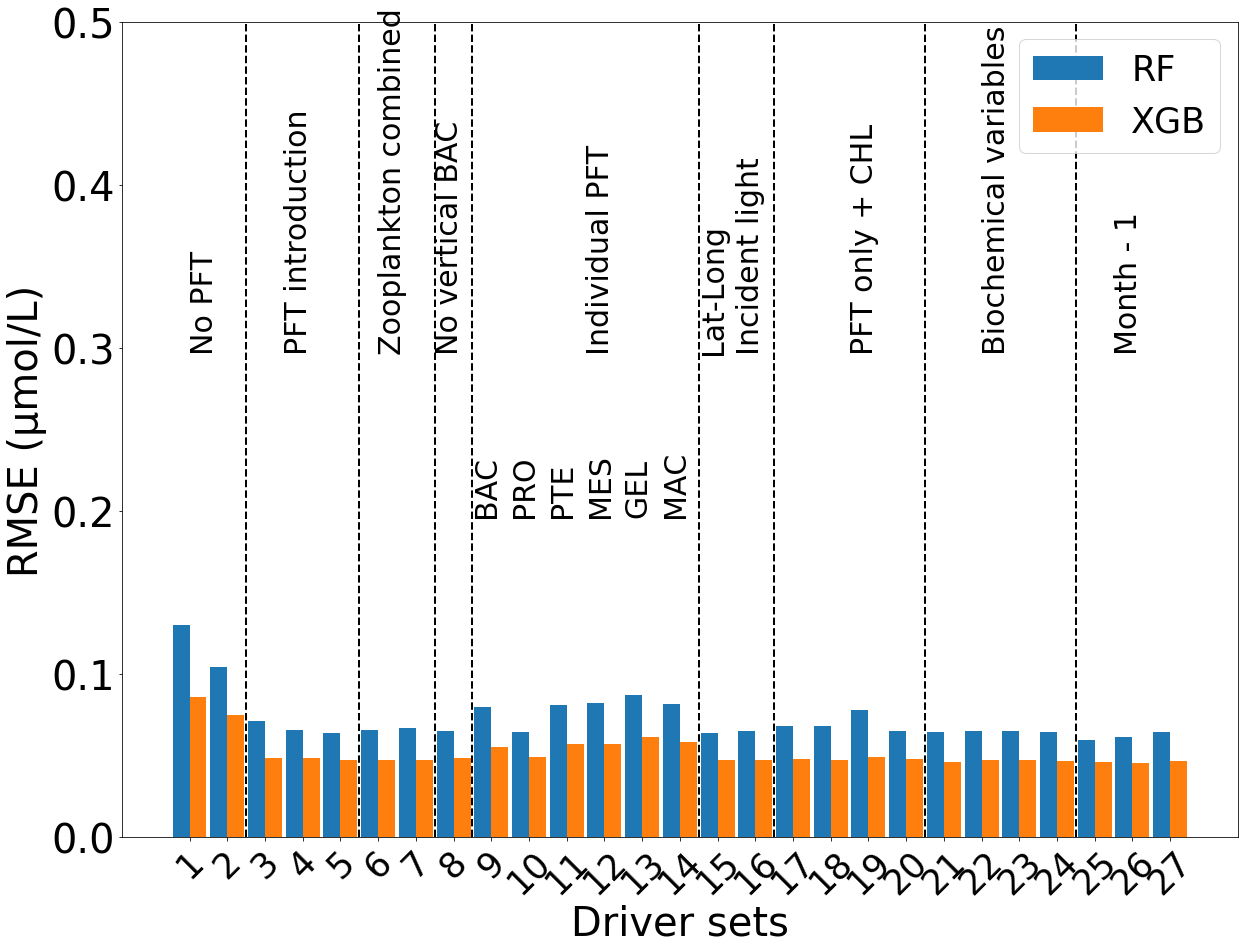

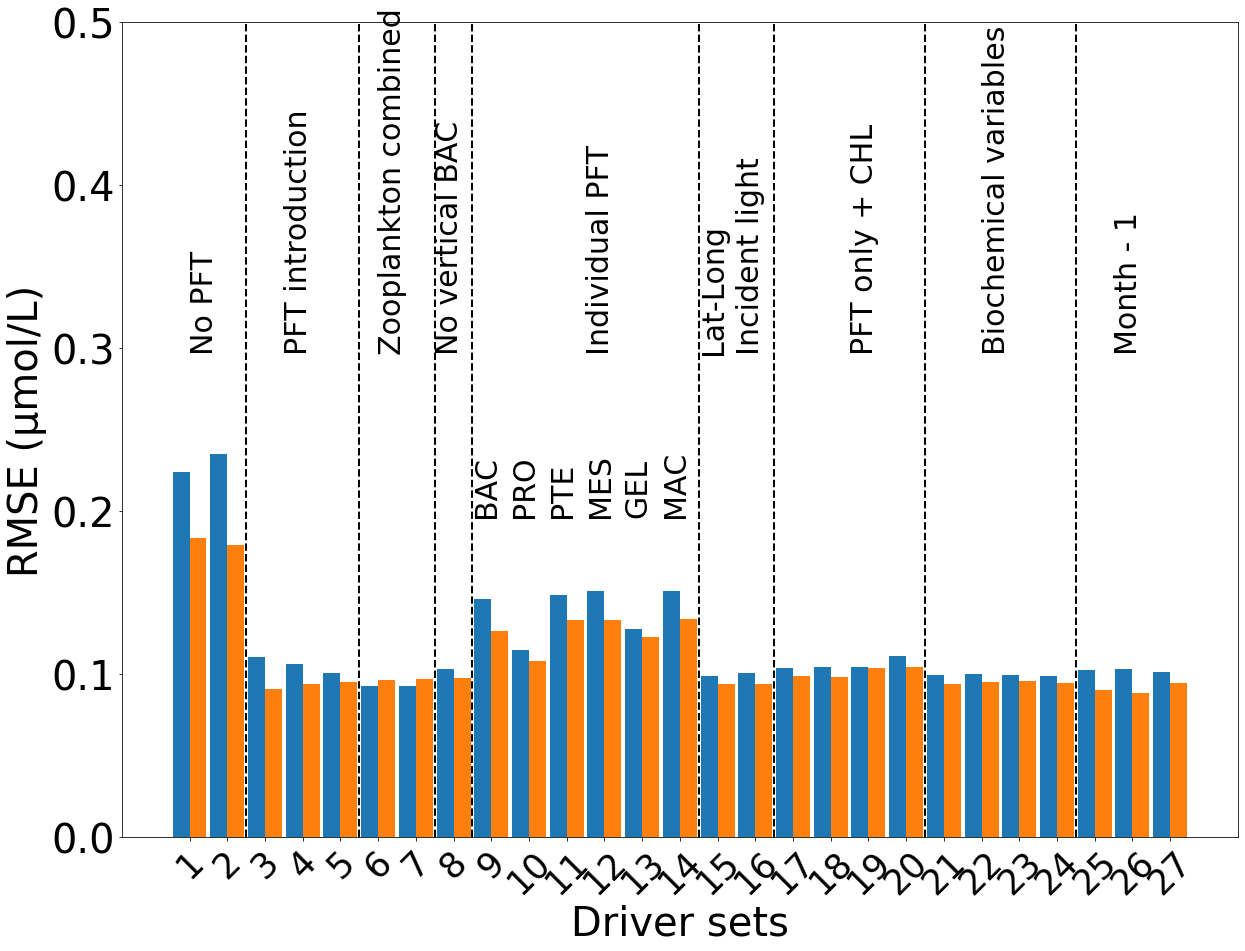

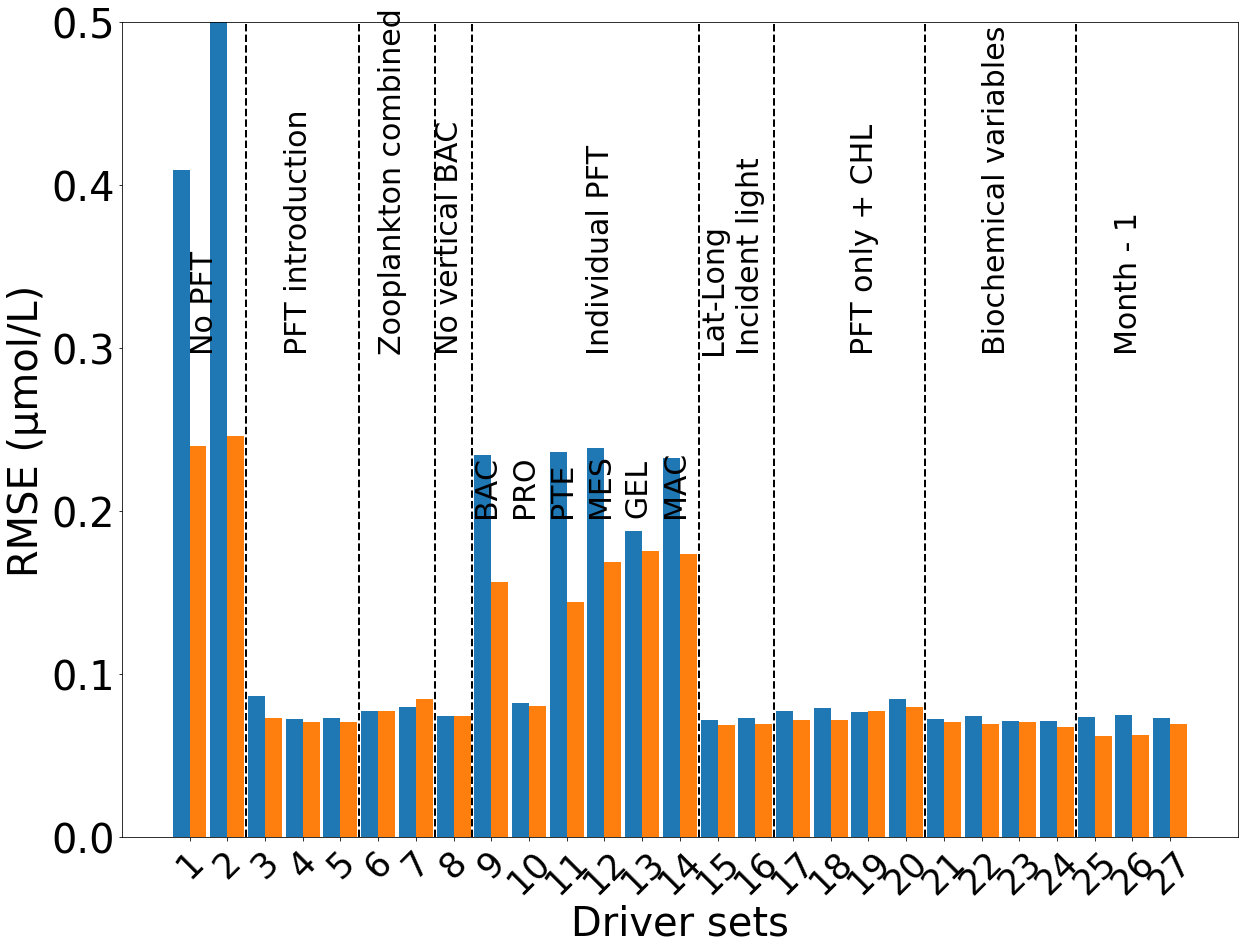

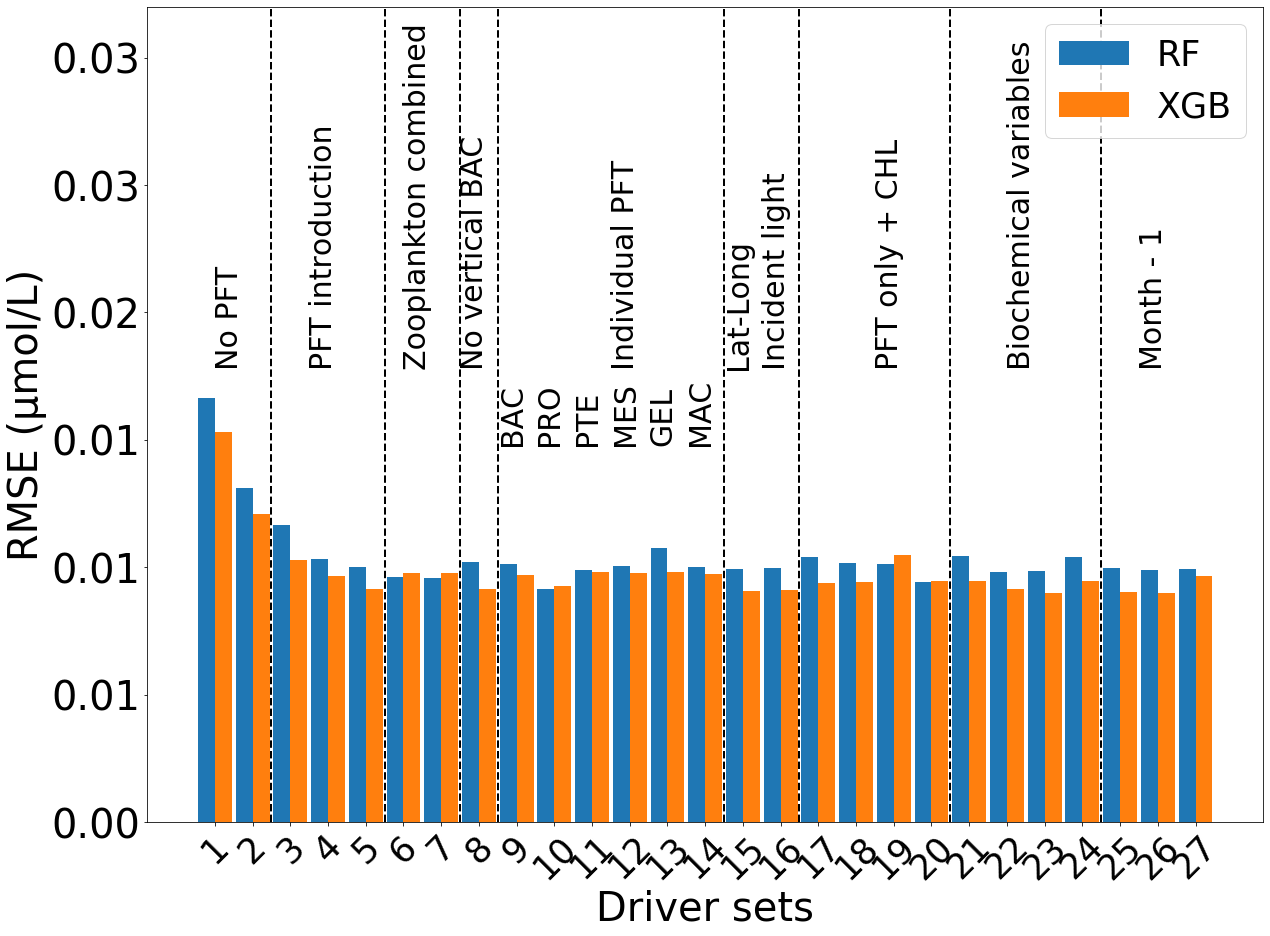

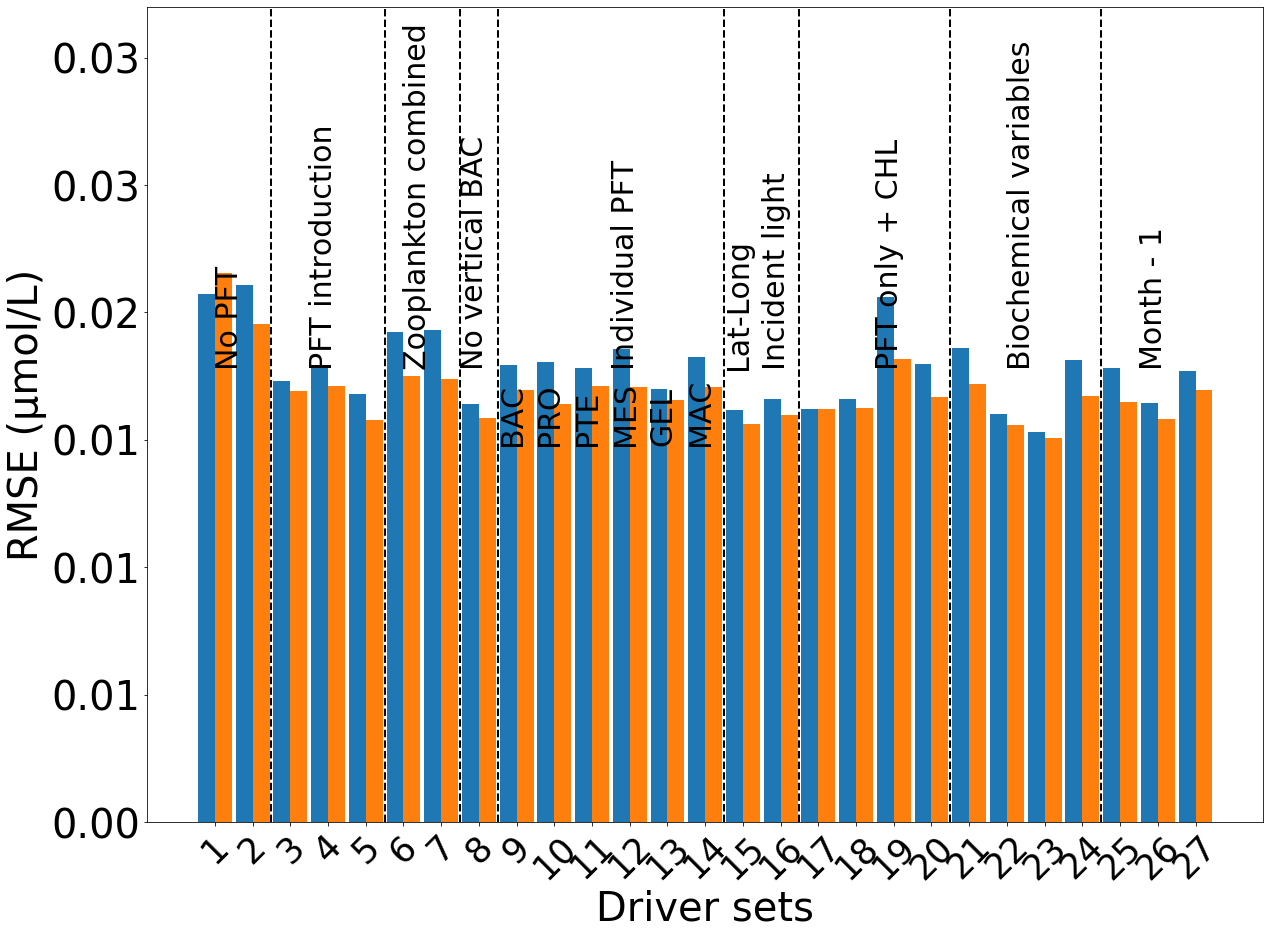

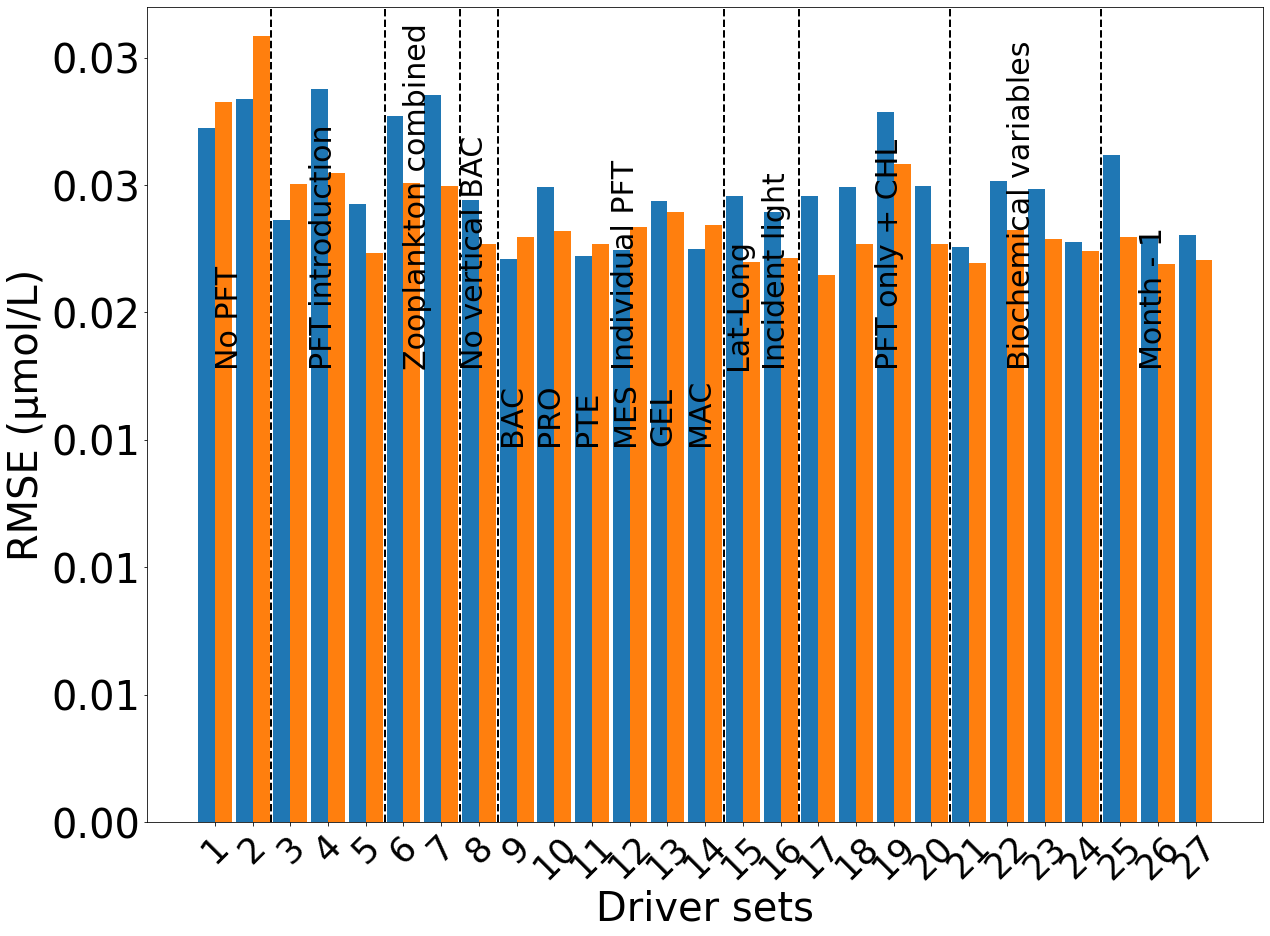

In [47]:
for var in var_reconstr:
    if var == 'POC':
        ymax = 0.5
        y_text_pos1 = 0.3
        y_text_pos2 = 0.2
    else:
        ymax = 0.032
        y_text_pos1 = 0.018
        y_text_pos2 = 0.015
    for n_set in names:
        Plot_bar(x,eval('Diagnostics_'+var+'_RF'),eval('Diagnostics_'+var+'_XGB'),'RMSE '+n_set,'RF','XGB',\
                 'RMSE (\u03BCmol/L)',width,0.,ymax,y_text_pos1,y_text_pos2,var+'_RMSE_RFXGB_bars_'+n_set+'_2.png')

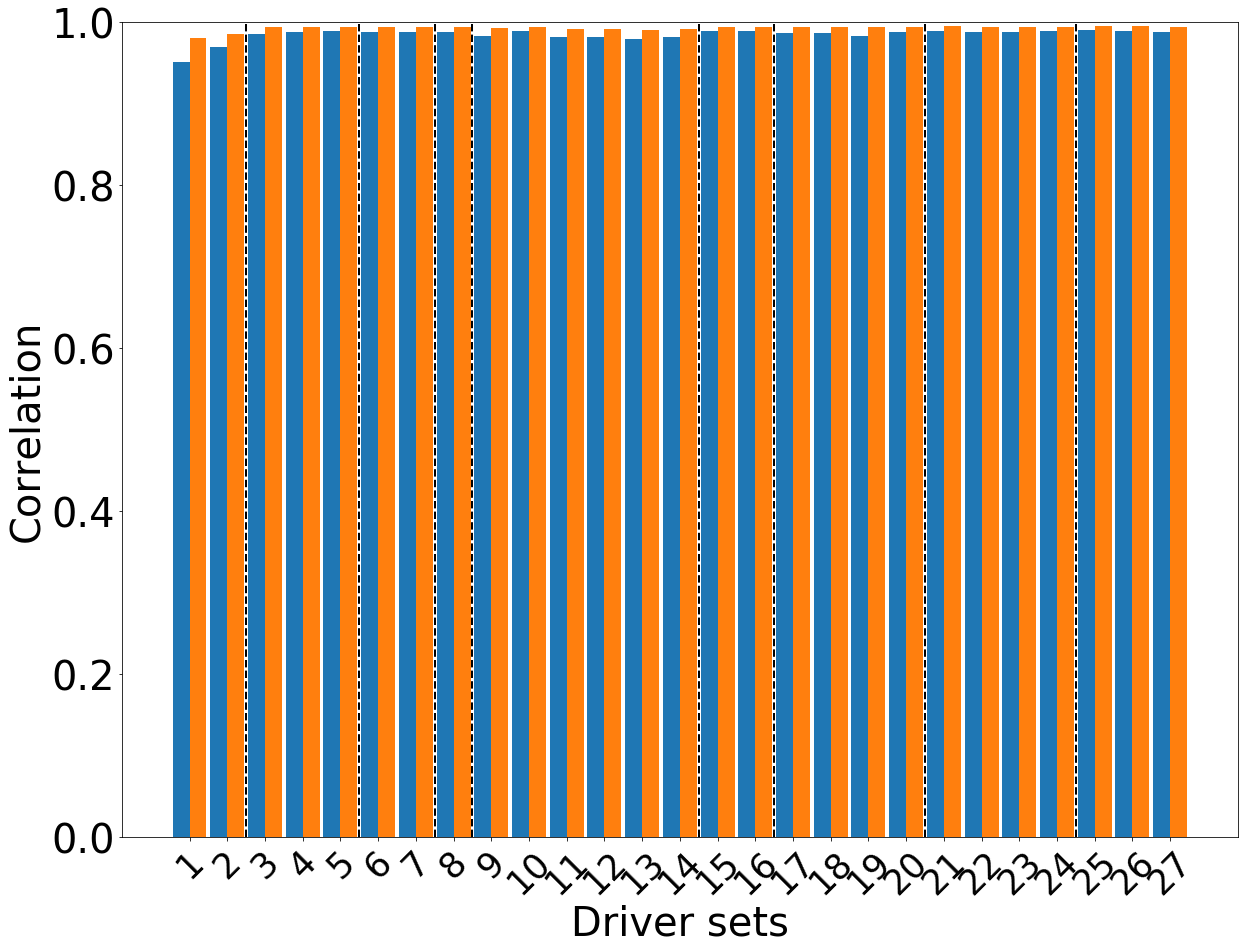

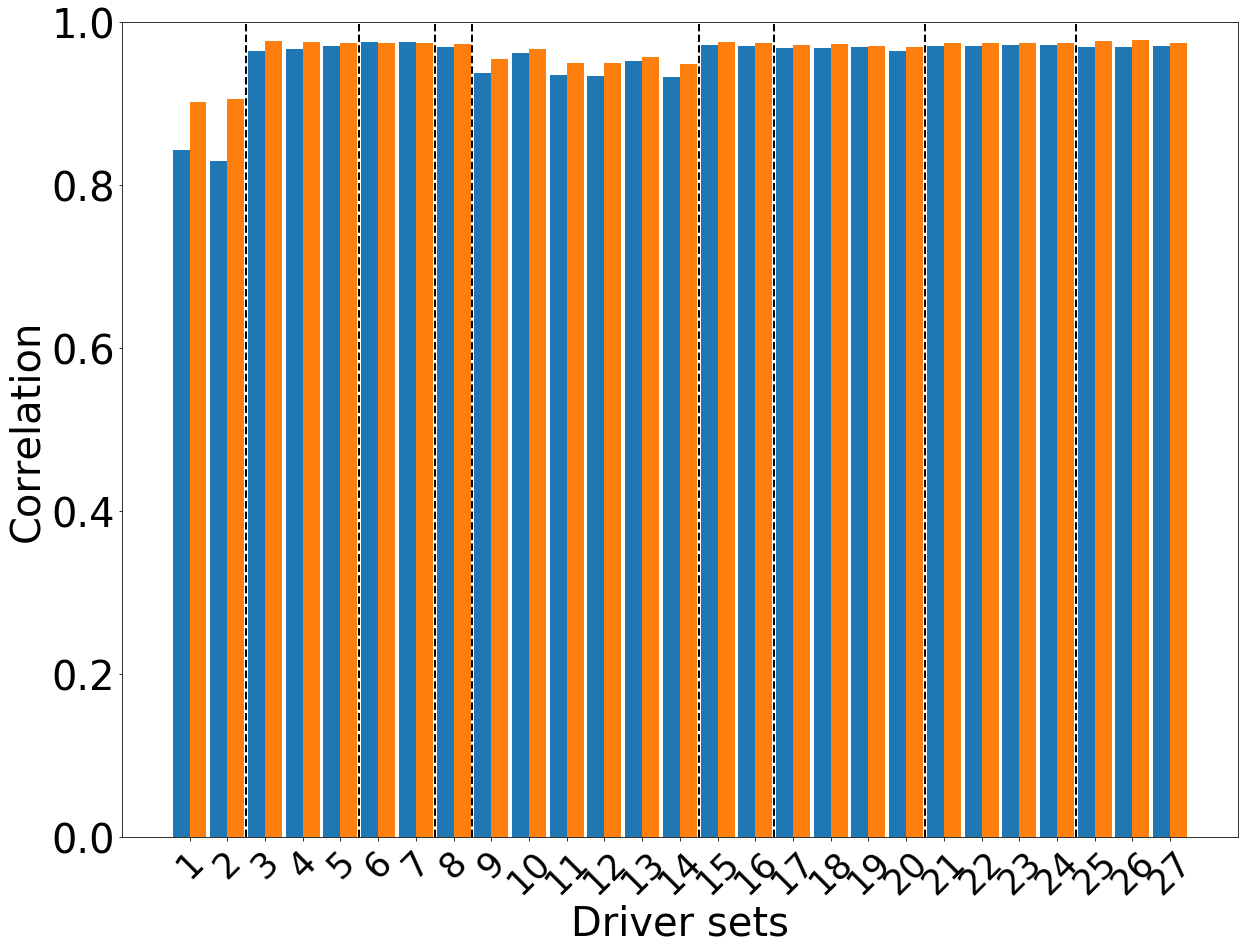

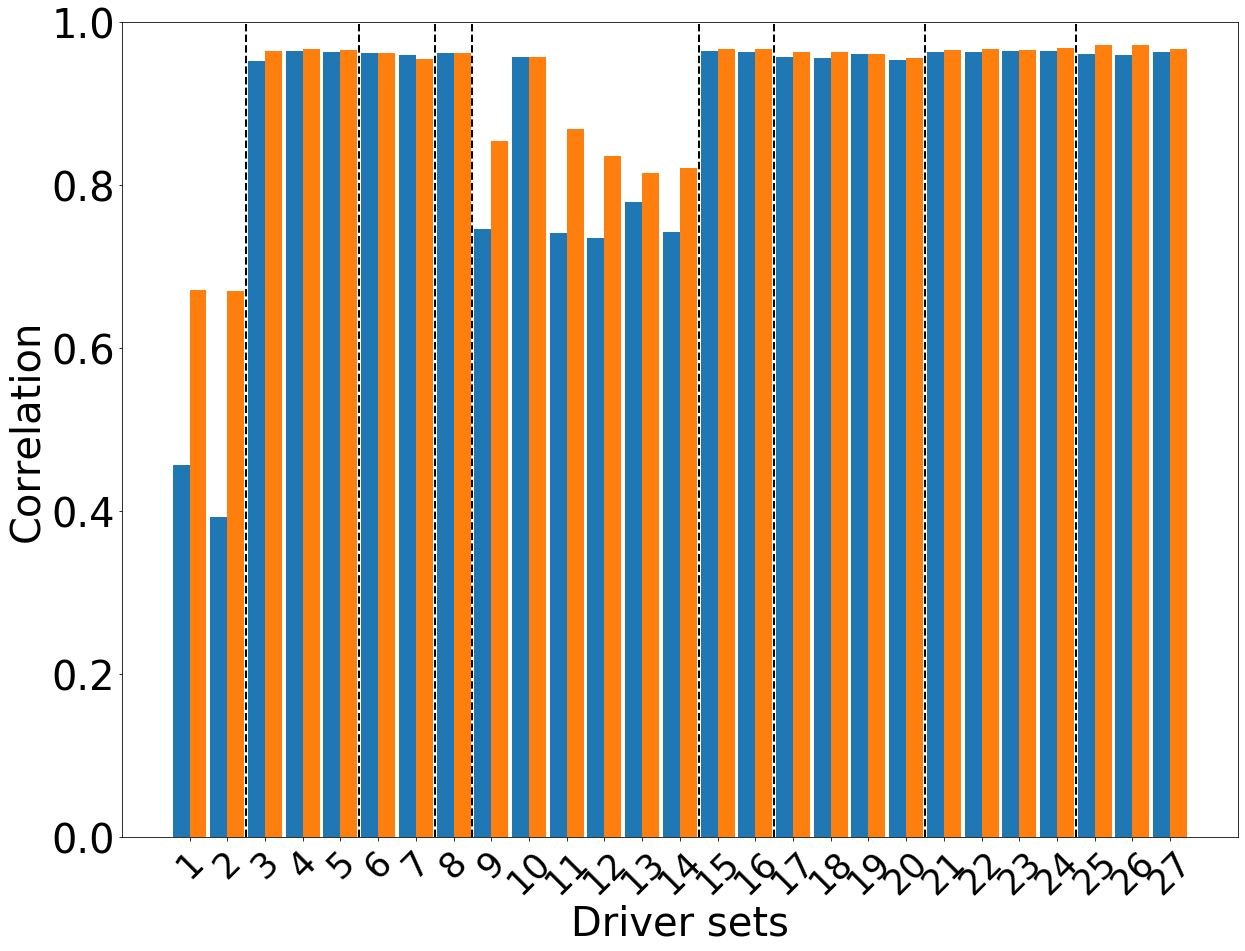

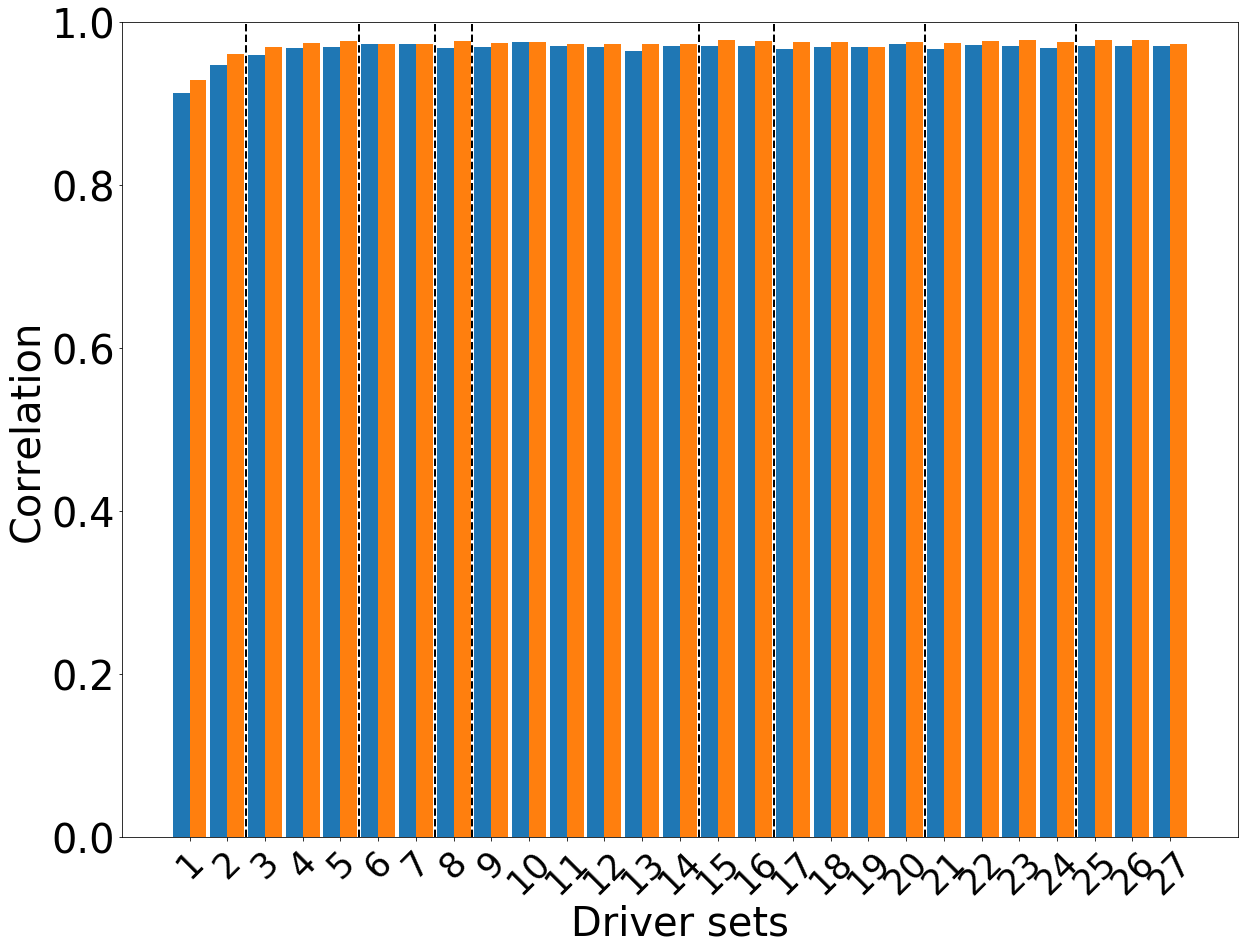

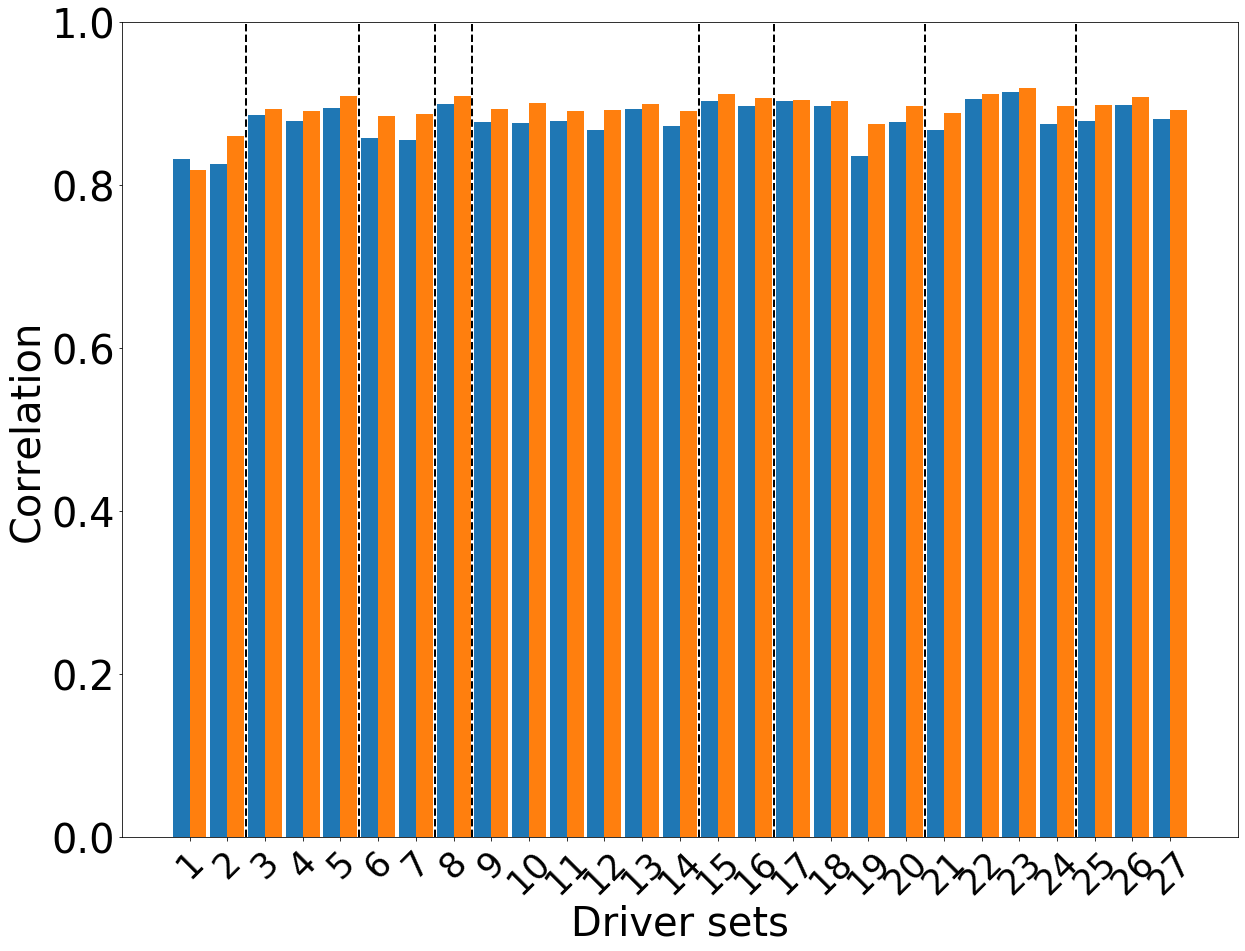

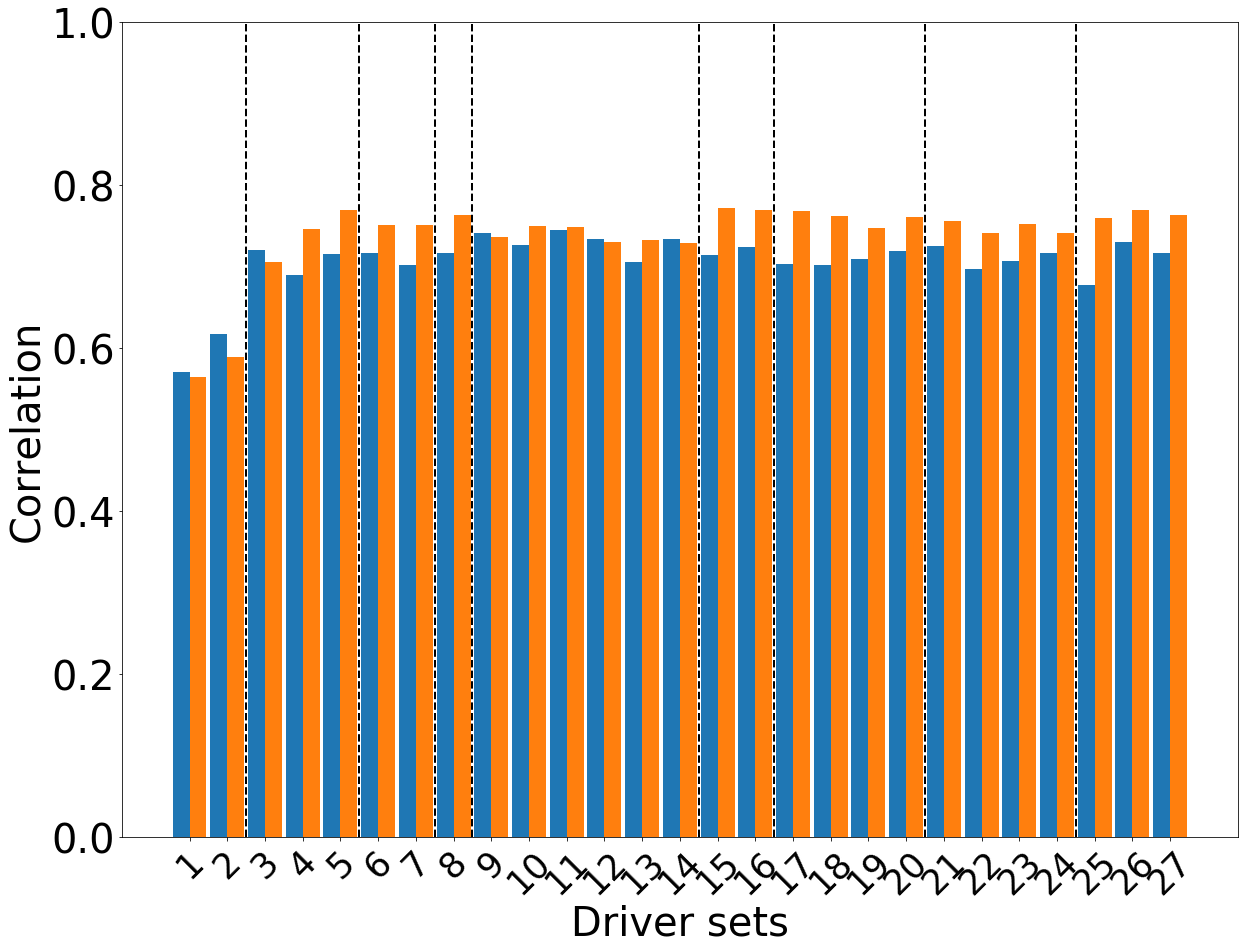

In [35]:
for var in var_reconstr:
    for n_set in names:
        Plot_bar(x,eval('Diagnostics_'+var+'_RF'),eval('Diagnostics_'+var+'_XGB'),'Corr '+n_set,'RF','XGB',\
                 'Correlation',width,0.,1.,y_text_pos1,y_text_pos2,var+'_Corr_RFXGB_bars_'+n_set+'_2.png')

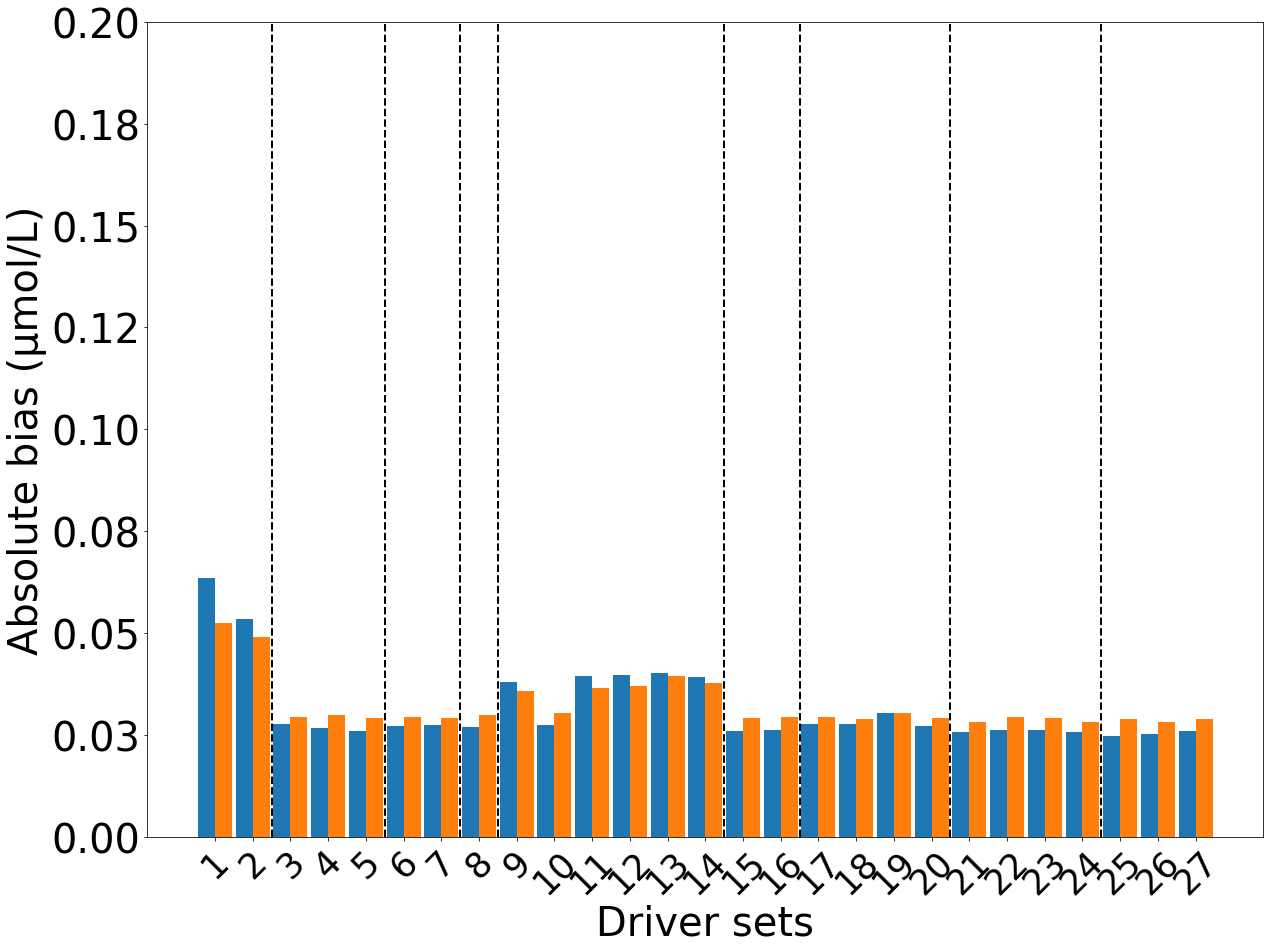

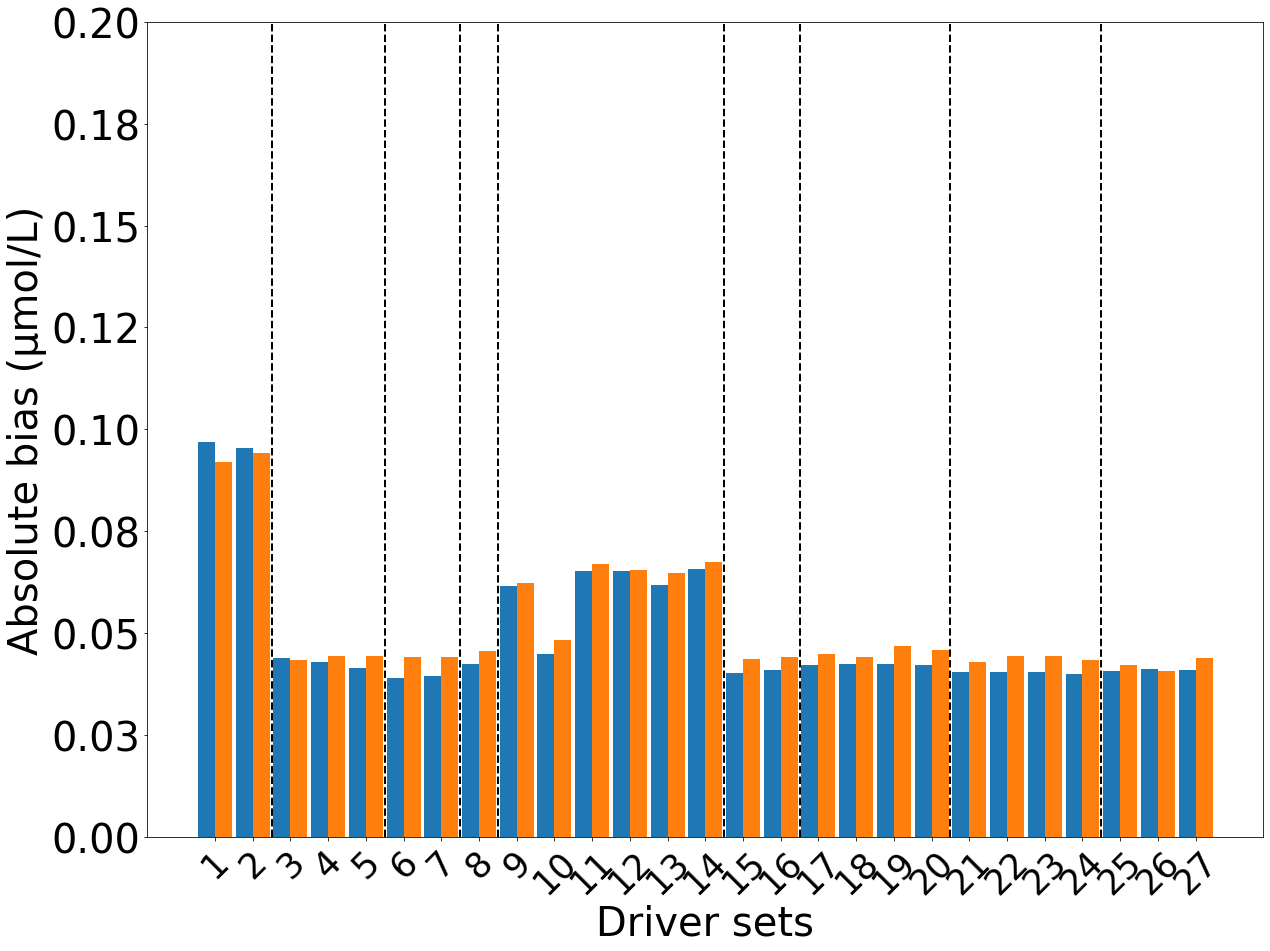

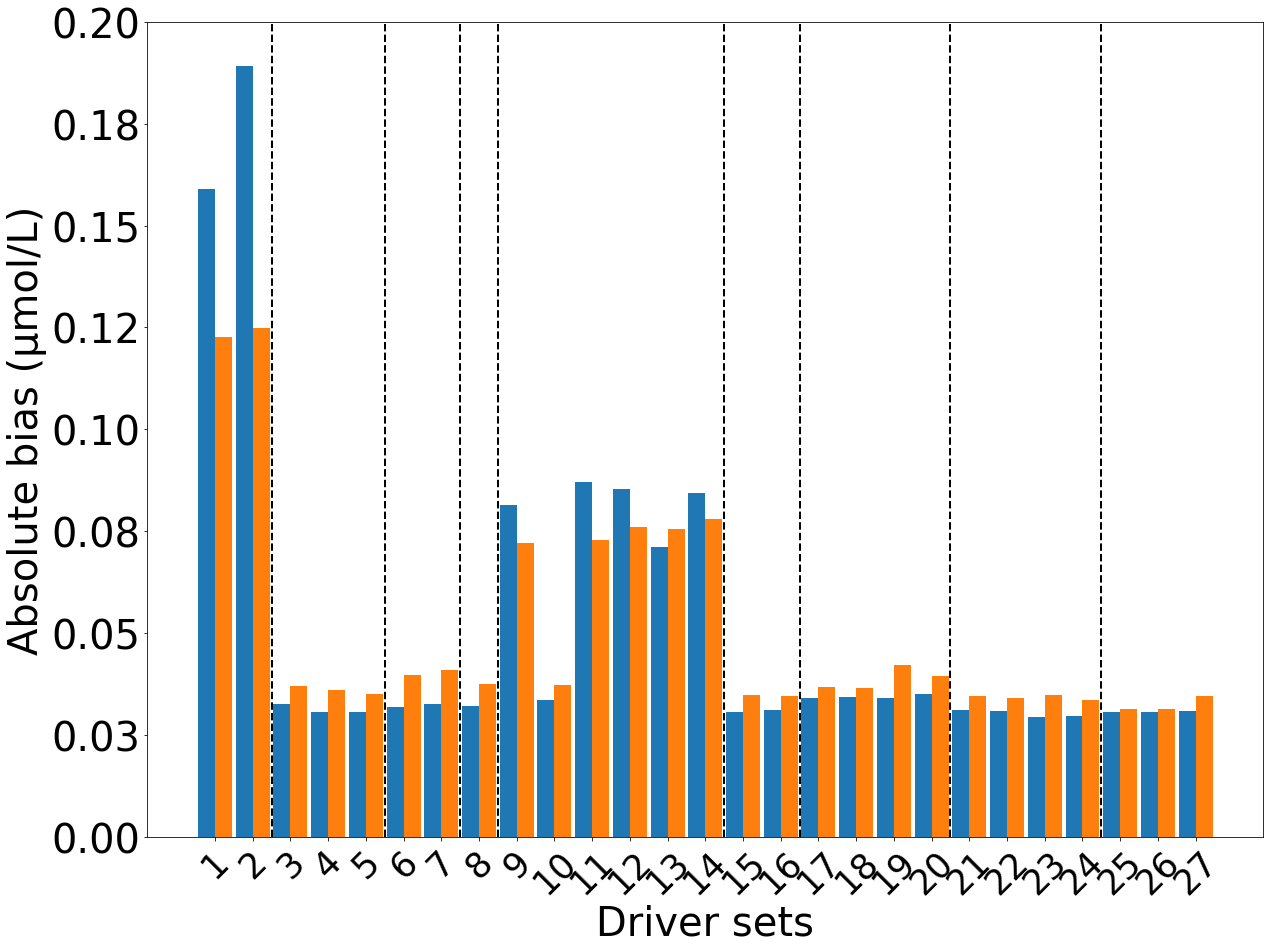

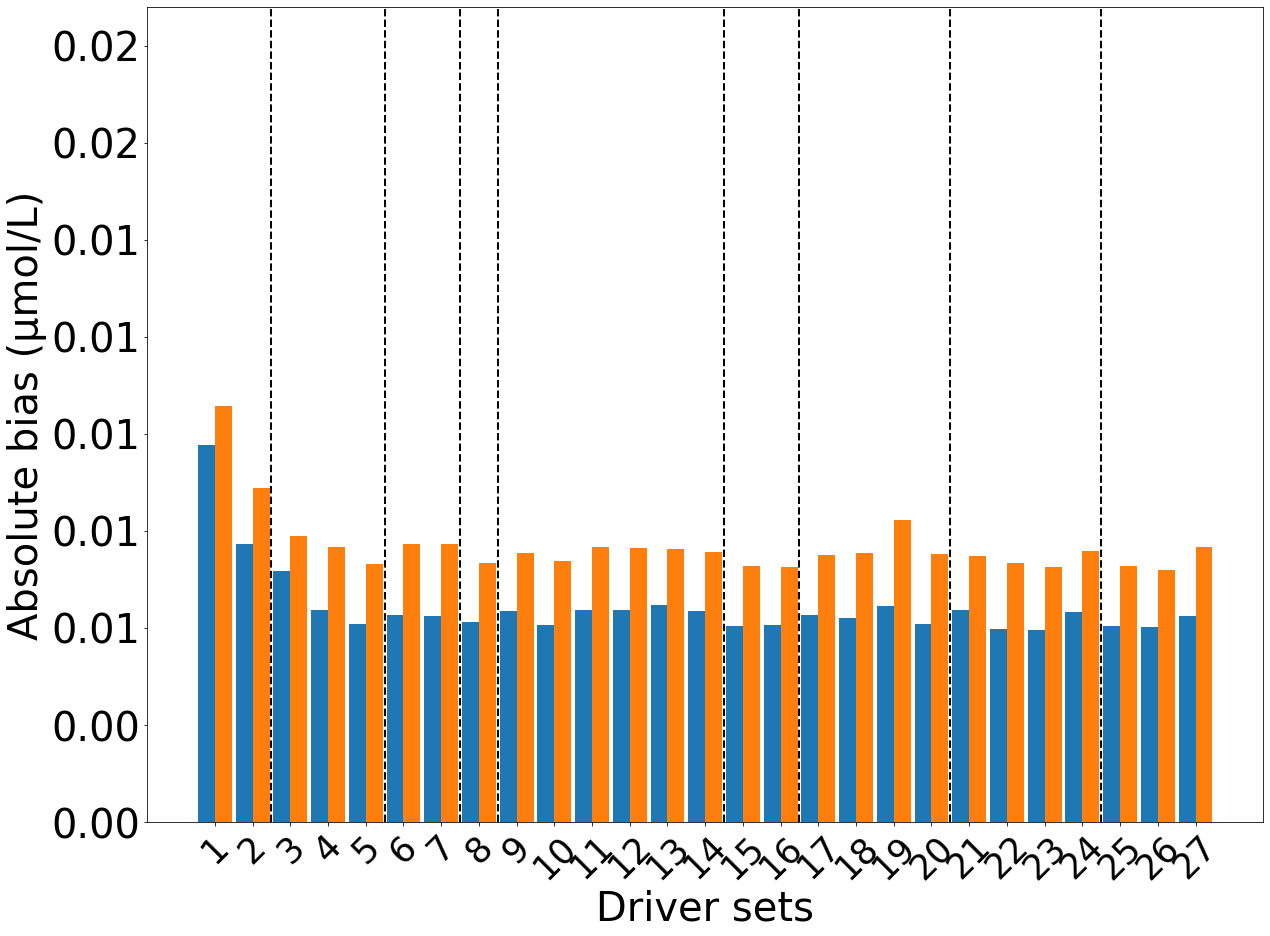

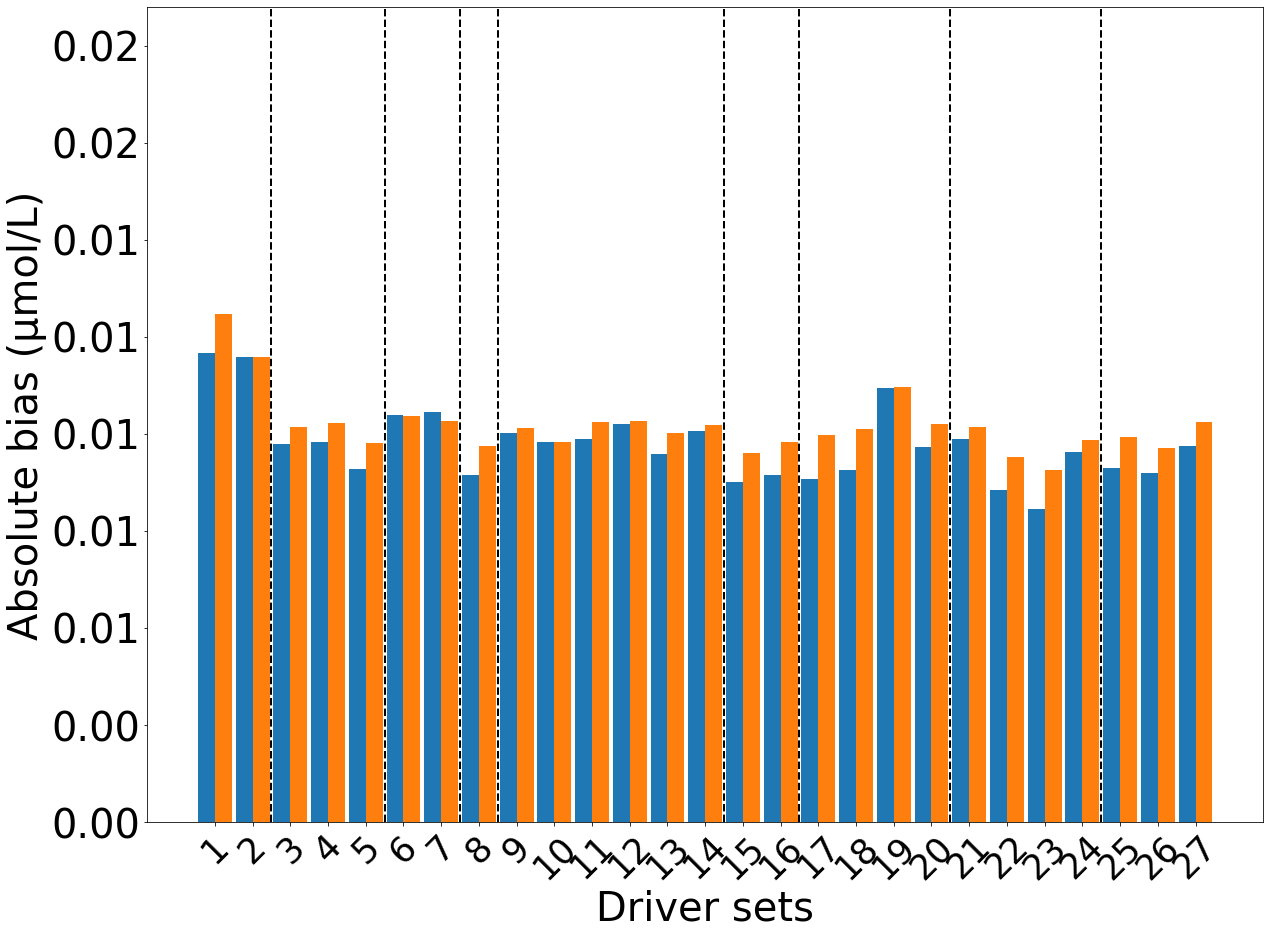

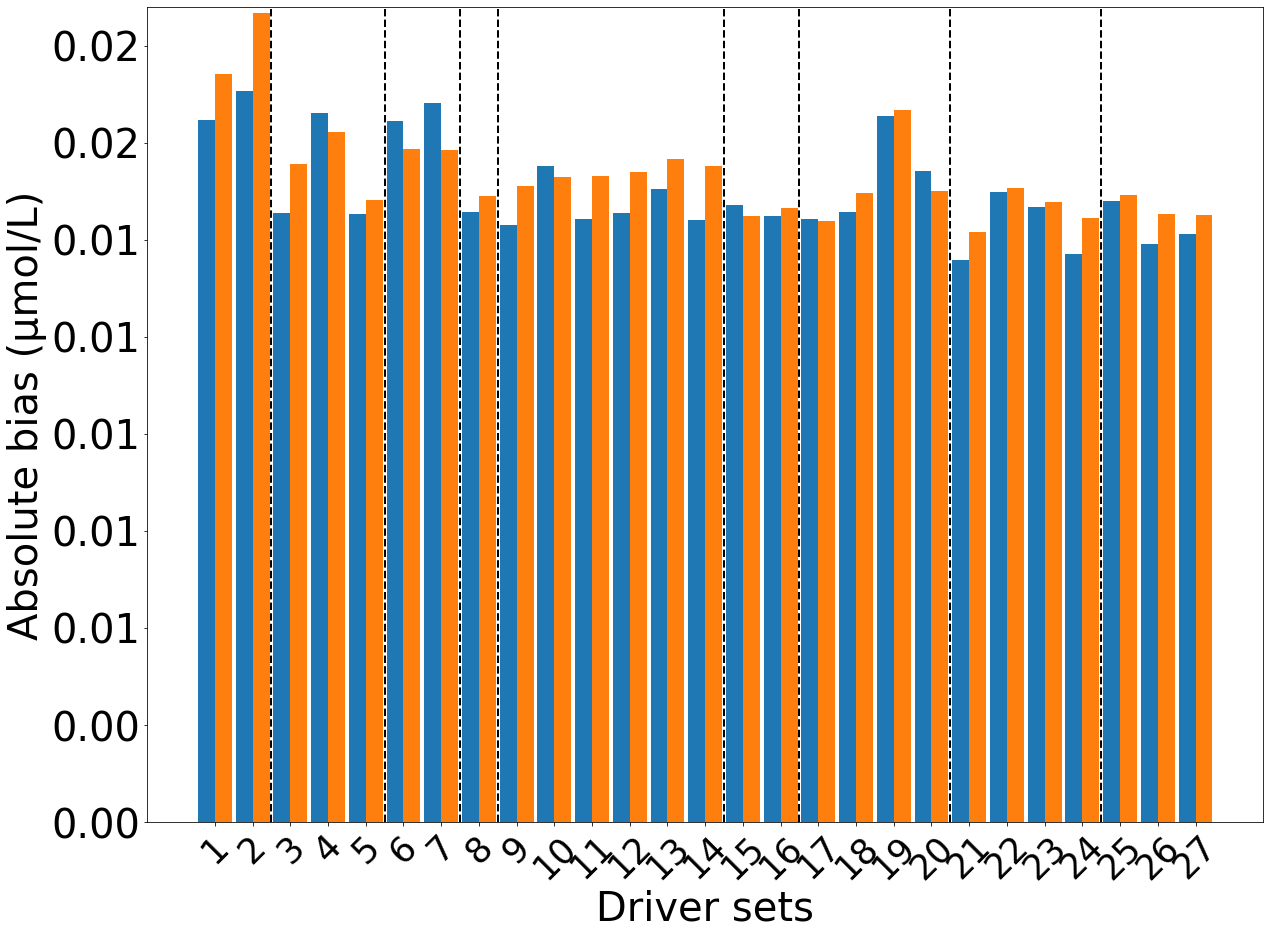

In [45]:
for var in var_reconstr:
    if var == 'POC':
        ymax = 0.2
    else:
        ymax = 0.021
    for n_set in names:
        Plot_bar(x,eval('Diagnostics_'+var+'_RF'),eval('Diagnostics_'+var+'_XGB'),'Bias_abs '+n_set,'RF','XGB',\
                 'Absolute bias (\u03BCmol/L)',width,0.,ymax,y_text_pos1,y_text_pos2,var+'_Abs_Bias_RFXGB_bars_'+n_set+'_2.png')

In [94]:
Test_names = ['_NoPFT','_NoPFT_MLD','_PFT','_PhMLD','_PhZMLD','_zootest','_zootest2','_PhZBACMLD','_PhZMLD_BAC',\
             '_PhZMLD_PRO','_PhZMLD_PTE','_PhZMLD_MES','_PhZMLD_GEL','_PhZMLD_MAC','_PhZMLD_latlon','_PhZMLD_day',\
             '_PhZMLD_only','_PhZMLD_only_CHL','_zootest_only_CHL','_zootestMLD_only_CHL','_PhZMLD_CHL',\
             '_PhZMLD_NO3','_PhZMLD_PO4','_PhZMLD_chim','_PhZMLD_back1','_PhZMLD_back2','_PhZMLD_back3']

In [110]:
#read data for feature importance
Imp_df_POC_RF = pd.read_csv('Importance_df_POC_RF__NoPFT.csv')
Imp_df_POC_XGB = pd.read_csv('Importance_df_POC_XGB__NoPFT.csv')
Imp_df_GOC_RF = pd.read_csv('Importance_df_GOC_RF_NoPFT.csv')
Imp_df_GOC_XGB = pd.read_csv('mportance_df_GOC_XGB__NoPFT.csv')

for name in Test_names[1:]:
    Imp_df_POC_RF1 = pd.read_csv('Importance_df_POC_RF_'+name+'_2.csv')
    Imp_df_POC_RF = pd.merge(Imp_df_POC_RF,Imp_df_POC_RF1, on = 'Feature',how = 'outer')
    Imp_df_POC_XGB1 = pd.read_csv('Importance_df_POC_XGB_'+name+'_2.csv')
    Imp_df_POC_XGB = pd.merge(Imp_df_POC_XGB,Imp_df_POC_XGB1, on = 'Feature',how = 'outer')
    Imp_df_GOC_RF1 = pd.read_csv('Importance_df_GOC_RF'+name+'_2.csv')
    Imp_df_GOC_RF = pd.merge(Imp_df_GOC_RF,Imp_df_GOC_RF1, on = 'Feature',how = 'outer')
    Imp_df_GOC_XGB1 = pd.read_csv('Importance_df_GOC_XGB_'+name+'_2.csv')
    Imp_df_GOC_XGB = pd.merge(Imp_df_GOC_XGB,Imp_df_GOC_XGB1, on = 'Feature',how = 'outer')


In [111]:
Imp_df_POC_RF['mean']  = Imp_df_POC_RF.mean(axis=1)
Imp_df_POC_XGB['mean'] = Imp_df_POC_XGB.mean(axis=1)
Imp_df_GOC_RF['mean']  = Imp_df_GOC_RF.mean(axis=1)
Imp_df_GOC_XGB['mean'] = Imp_df_GOC_XGB.mean(axis=1)


In [139]:
Imp_df_POC_RF_plot  = Imp_df_POC_RF[['Feature','mean']]
Imp_df_POC_XGB_plot = Imp_df_POC_XGB[['Feature','mean']]
Imp_df_GOC_RF_plot  = Imp_df_GOC_RF[['Feature','mean']]
Imp_df_GOC_XGB_plot = Imp_df_GOC_XGB[['Feature','mean']]

In [140]:
Imp_df_POC_RF_plot  = Imp_df_POC_RF_plot.set_index('Feature')
Imp_df_POC_XGB_plot = Imp_df_POC_XGB_plot.set_index('Feature')
Imp_df_GOC_RF_plot  = Imp_df_GOC_RF_plot.set_index('Feature')
Imp_df_GOC_XGB_plot = Imp_df_GOC_XGB_plot.set_index('Feature')

In [146]:
Imp_df_POC_RF_plot  = Imp_df_POC_RF_plot.sort_values(by=['mean'])
Imp_df_POC_XGB_plot = Imp_df_POC_XGB_plot.sort_values(by=['mean'])
Imp_df_GOC_RF_plot  = Imp_df_GOC_RF_plot.sort_values(by=['mean'])
Imp_df_GOC_XGB_plot = Imp_df_GOC_XGB_plot.sort_values(by=['mean'])

In [157]:
Imp_df_POC_RF_plot = Imp_df_POC_RF_plot.rename(index={'PRO': 'PRO vp', 'PO4': 'PO4 vp', 'Temp': 'Temperature vp',\
                                                     'GEL_back': 'GEL back vp', 'PO4_mean': 'PO4 mean', 'NO3': 'NO3 vp',\
                                                     'CHL': 'CHL vp', 'PRO_back': 'PRO back vp', 'Big_zoopl': 'Big Zoopl',\
                                                     'BAC': 'BAC vp', 'Big_zoopl2': 'Big Zoopl2', 'CHL_mean': 'CHL mean',\
                                                     'PHA': 'PHA vp', 'PHA_mean': 'PHA mean', 'PRO_mean': 'PRO mean',\
                                                     'PIC_mean': 'PIC mean', 'NO3_mean': 'NO3 mean', 'MAC': 'MAC vp',\
                                                     'COC_mean': 'COC mean', 'PTE': 'PTE vp', 'CHL_back_mean': \
                                                      'CHL back mean', 'FIX': 'FIX vp', 'PTE_mean': 'PTE mean',\
                                                     'CHL_back': 'CHL back vp', 'MES_mean': 'MES mean', 'COC': 'COC vp',\
                                                     'MIX_mean': 'MIX mean', 'PIC': 'PIC vp', 'MAC_mean': 'MAC mean',\
                                                     'DIA': 'DIA vp', 'COC_back_mean': 'COC back mean', 'MES': 'MES vp',\
                                                     'DIA_mean': 'DIA mean', 'MAC_back': 'MAC back vp','cos_lon': 'cos(long)',\
                                                     'BAC_mean': 'BAC mean', 'FIX_mean': 'FIX mean', 'GEL_mean': 'GEL mean',\
                                                     'sin_lon': 'sin(long)', 'sin_lat': 'sin(lat)', 'inc_light': 'incident light',\
                                                     'GEL': 'GEL vp', 'MIX': 'MIX vp'})

Imp_df_POC_XGB_plot = Imp_df_POC_XGB_plot.rename(index={'PRO': 'PRO vp', 'PO4': 'PO4 vp', 'Temp': 'Temperature vp',\
                                                     'GEL_back': 'GEL back vp', 'PO4_mean': 'PO4 mean', 'NO3': 'NO3 vp',\
                                                     'CHL': 'CHL vp', 'PRO_back': 'PRO back vp', 'Big_zoopl': 'Big Zoopl',\
                                                     'BAC': 'BAC vp', 'Big_zoopl2': 'Big Zoopl2', 'CHL_mean': 'CHL mean',\
                                                     'PHA': 'PHA vp', 'PHA_mean': 'PHA mean', 'PRO_mean': 'PRO mean',\
                                                     'PIC_mean': 'PIC mean', 'NO3_mean': 'NO3 mean', 'MAC': 'MAC vp',\
                                                     'COC_mean': 'COC mean', 'PTE': 'PTE vp', 'CHL_back_mean': \
                                                      'CHL back mean', 'FIX': 'FIX vp', 'PTE_mean': 'PTE mean',\
                                                     'CHL_back': 'CHL back vp', 'MES_mean': 'MES mean', 'COC': 'COC vp',\
                                                     'MIX_mean': 'MIX mean', 'PIC': 'PIC vp', 'MAC_mean': 'MAC mean',\
                                                     'DIA': 'DIA vp', 'COC_back_mean': 'COC back mean', 'MES': 'MES vp',\
                                                     'DIA_mean': 'DIA mean', 'MAC_back': 'MAC back vp','cos_lon': 'cos(long)',\
                                                     'BAC_mean': 'BAC mean', 'FIX_mean': 'FIX mean', 'GEL_mean': 'GEL mean',\
                                                     'sin_lon': 'sin(long)', 'sin_lat': 'sin(lat)', 'inc_light': 'incident light',\
                                                     'GEL': 'GEL vp', 'MIX': 'MIX vp'})

Imp_df_GOC_RF_plot = Imp_df_GOC_RF_plot.rename(index={'PRO': 'PRO vp', 'PO4': 'PO4 vp', 'Temp': 'Temperature vp',\
                                                     'GEL_back': 'GEL back vp', 'PO4_mean': 'PO4 mean', 'NO3': 'NO3 vp',\
                                                     'CHL': 'CHL vp', 'PRO_back': 'PRO back vp', 'Big_zoopl': 'Big Zoopl',\
                                                     'BAC': 'BAC vp', 'Big_zoopl2': 'Big Zoopl2', 'CHL_mean': 'CHL mean',\
                                                     'PHA': 'PHA vp', 'PHA_mean': 'PHA mean', 'PRO_mean': 'PRO mean',\
                                                     'PIC_mean': 'PIC mean', 'NO3_mean': 'NO3 mean', 'MAC': 'MAC vp',\
                                                     'COC_mean': 'COC mean', 'PTE': 'PTE vp', 'CHL_back_mean': \
                                                      'CHL back mean', 'FIX': 'FIX vp', 'PTE_mean': 'PTE mean',\
                                                     'CHL_back': 'CHL back vp', 'MES_mean': 'MES mean', 'COC': 'COC vp',\
                                                     'MIX_mean': 'MIX mean', 'PIC': 'PIC vp', 'MAC_mean': 'MAC mean',\
                                                     'DIA': 'DIA vp', 'COC_back_mean': 'COC back mean', 'MES': 'MES vp',\
                                                     'DIA_mean': 'DIA mean', 'MAC_back': 'MAC back vp','cos_lon': 'cos(long)',\
                                                     'BAC_mean': 'BAC mean', 'FIX_mean': 'FIX mean', 'GEL_mean': 'GEL mean',\
                                                     'sin_lon': 'sin(long)', 'sin_lat': 'sin(lat)', 'inc_light': 'incident light',\
                                                     'GEL': 'GEL vp', 'MIX': 'MIX vp'})

Imp_df_GOC_XGB_plot = Imp_df_GOC_XGB_plot.rename(index={'PRO': 'PRO vp', 'PO4': 'PO4 vp', 'Temp': 'Temperature vp',\
                                                     'GEL_back': 'GEL back vp', 'PO4_mean': 'PO4 mean', 'NO3': 'NO3 vp',\
                                                     'CHL': 'CHL vp', 'PRO_back': 'PRO back vp', 'Big_zoopl': 'Big Zoopl',\
                                                     'BAC': 'BAC vp', 'Big_zoopl2': 'Big Zoopl2', 'CHL_mean': 'CHL mean',\
                                                     'PHA': 'PHA vp', 'PHA_mean': 'PHA mean', 'PRO_mean': 'PRO mean',\
                                                     'PIC_mean': 'PIC mean', 'NO3_mean': 'NO3 mean', 'MAC': 'MAC vp',\
                                                     'COC_mean': 'COC mean', 'PTE': 'PTE vp', 'CHL_back_mean': \
                                                      'CHL back mean', 'FIX': 'FIX vp', 'PTE_mean': 'PTE mean',\
                                                     'CHL_back': 'CHL back vp', 'MES_mean': 'MES mean', 'COC': 'COC vp',\
                                                     'MIX_mean': 'MIX mean', 'PIC': 'PIC vp', 'MAC_mean': 'MAC mean',\
                                                     'DIA': 'DIA vp', 'COC_back_mean': 'COC back mean', 'MES': 'MES vp',\
                                                     'DIA_mean': 'DIA mean', 'MAC_back': 'MAC back vp','cos_lon': 'cos(long)',\
                                                     'BAC_mean': 'BAC mean', 'FIX_mean': 'FIX mean', 'GEL_mean': 'GEL mean',\
                                                     'sin_lon': 'sin(long)', 'sin_lat': 'sin(lat)', 'inc_light': 'incident light',\
                                                     'GEL': 'GEL vp', 'MIX': 'MIX vp'})

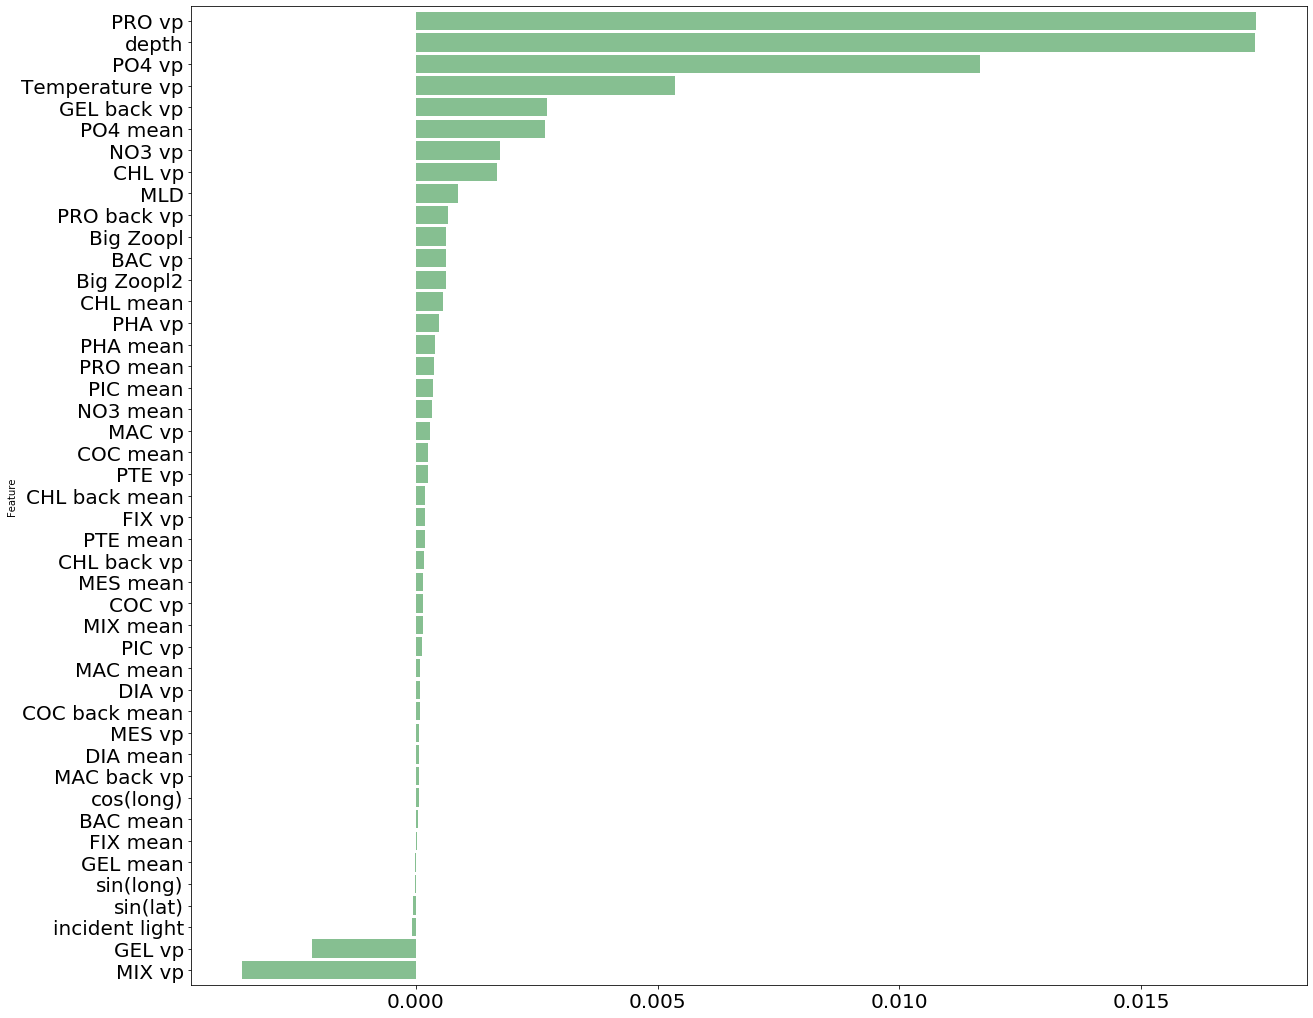

In [179]:
fig = Imp_df_POC_RF_plot.plot(kind='barh', figsize=(20, 18), fontsize = 20, color='#86bf91', zorder=2, width=0.85, legend=False).get_figure()
fig.savefig('/Figures_Article/Feature_imp_POC_RF.png')


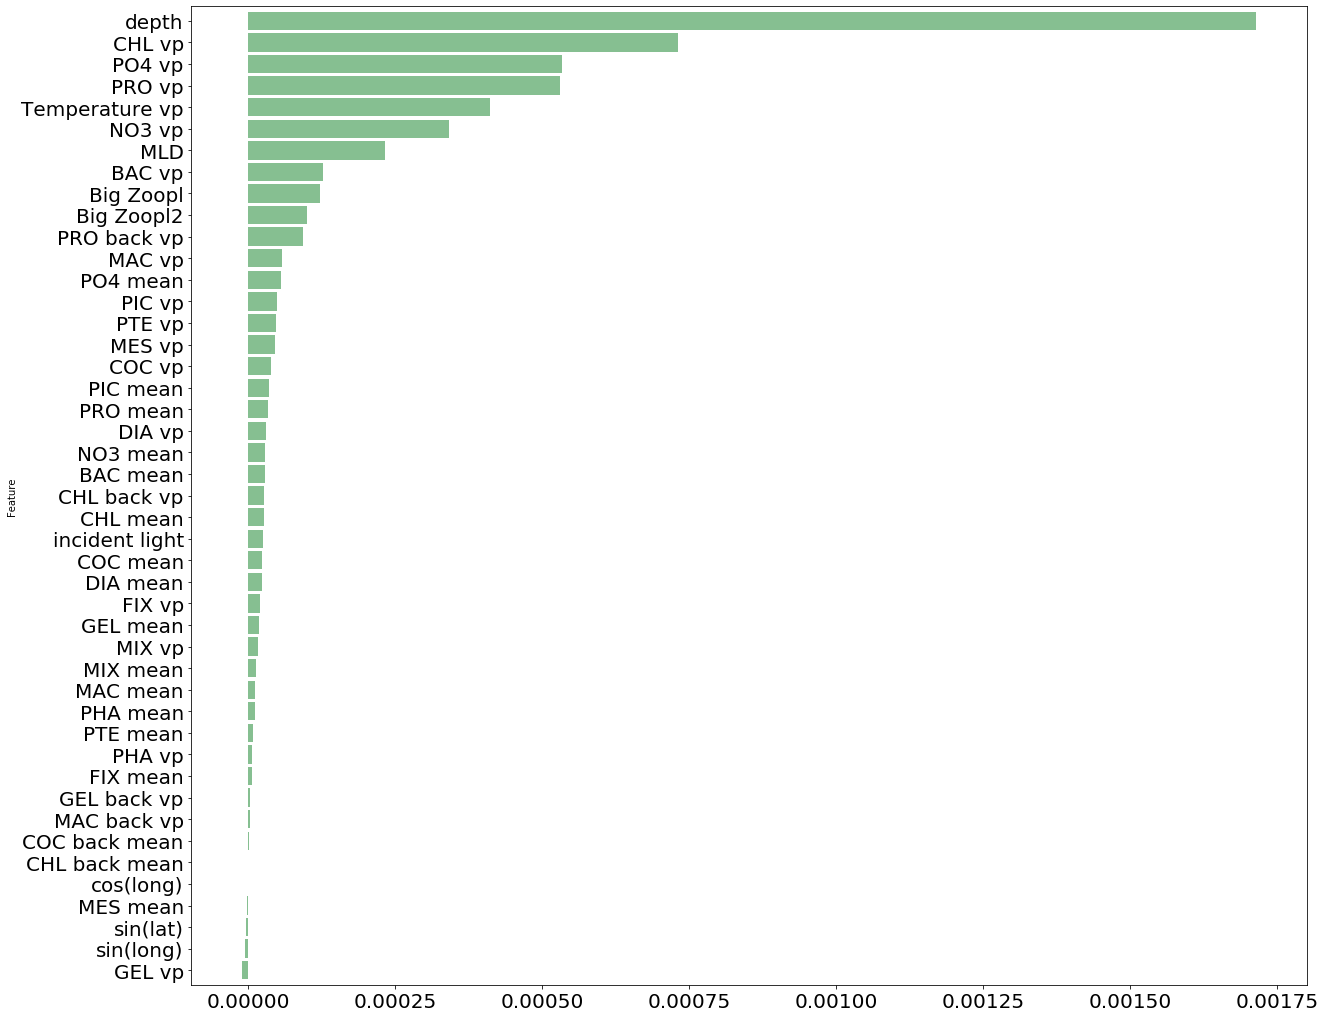

In [180]:
fig = Imp_df_POC_XGB_plot.plot(kind='barh', figsize=(20, 18), fontsize = 20, color='#86bf91', zorder=2, width=0.85, legend=False).get_figure()
fig.savefig('/Figures_Article/Feature_imp_POC_XGB.png')


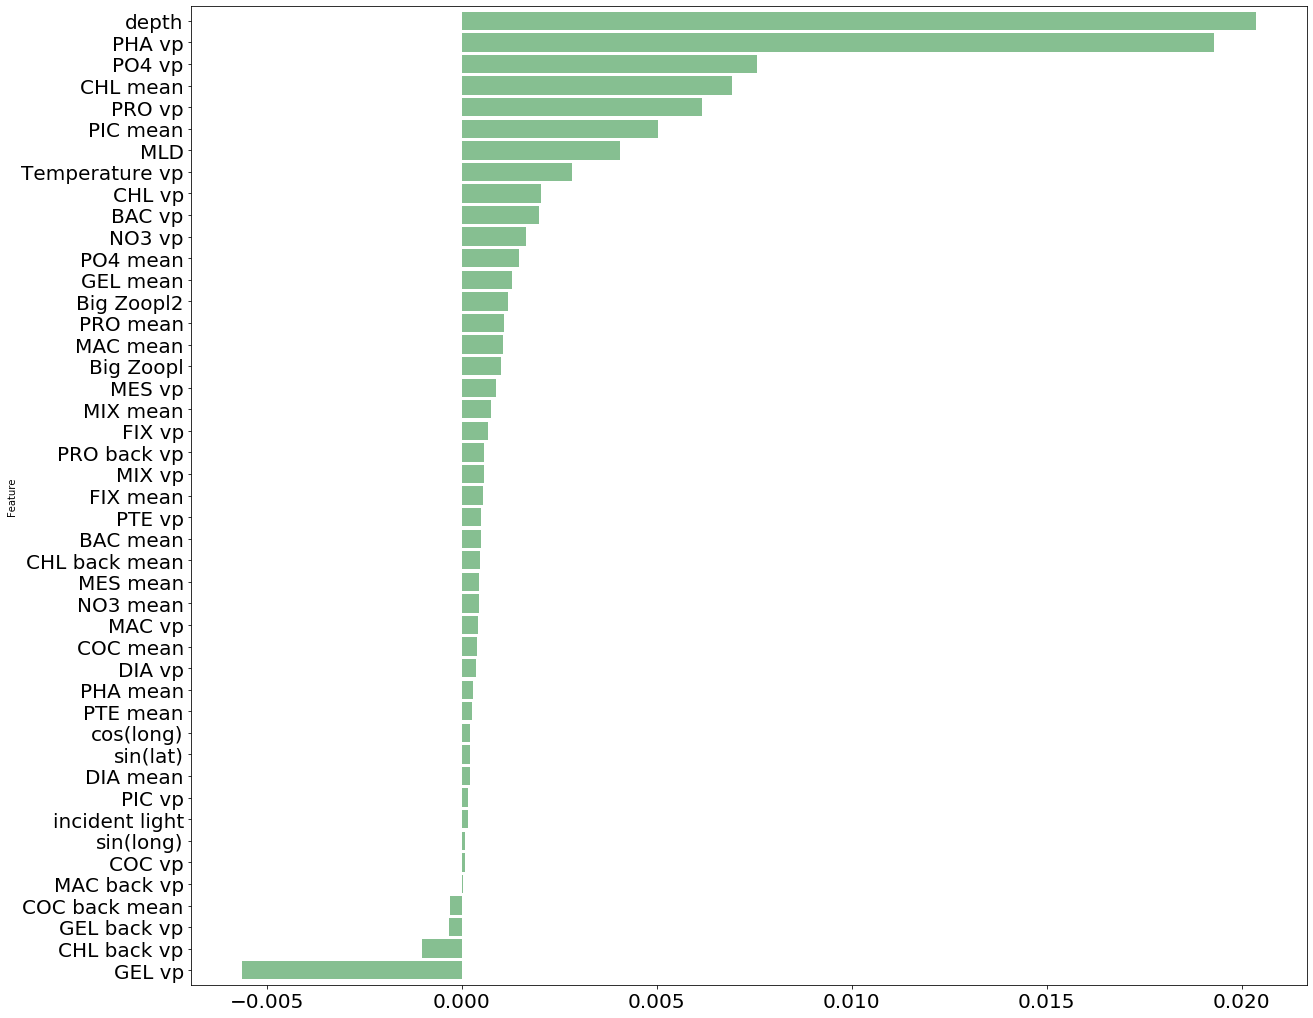

In [181]:
fig = Imp_df_GOC_RF_plot.plot(kind='barh', figsize=(20, 18), fontsize = 20, color='#86bf91', zorder=2, width=0.85, legend=False).get_figure()
fig.savefig('/Figures_Article/Feature_imp_GOC_RF.png')



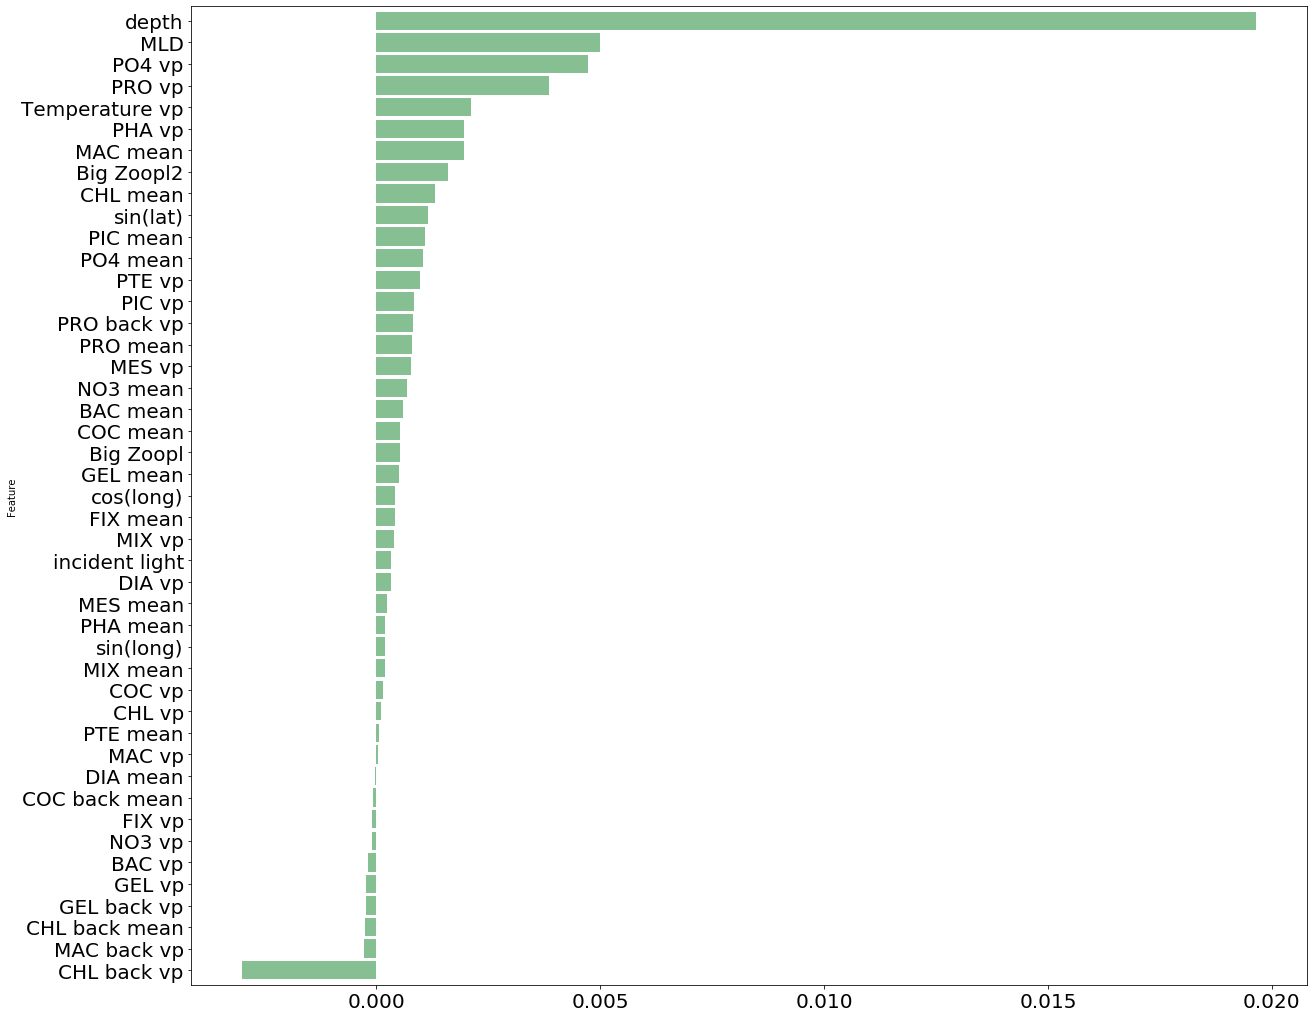

In [182]:
fig = Imp_df_GOC_XGB_plot.plot(kind='barh', figsize=(20, 18), fontsize = 20, color='#86bf91', zorder=2, width=0.85, legend=False).get_figure()
fig.savefig('/Figures_Article/Feature_imp_GOC_XGB.png')
